NOTE: You can run this code from the section 3 Network. We provided the *.csv file with hashed names. We left 1 Importing Data and 2 Cleaning sections just to preview the code.

# 1. Import data

# install drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# import data

additionally cleaning, dropping columns, changing column names...

In [3]:
PATH = '/content/drive/MyDrive/cogsci/cpm2/PROJECT-cpm2/CPM II project_cleaned-2.csv'
PATH_ADA = 'https://drive.google.com/drive/folders/1eS3URqruZLLuRxDitGbn5jJbgwMGce-T?usp=drive_link'

In [4]:
df = pd.read_csv(PATH)

In [ ]:
df.head()

In [6]:
# drop unimportant columns
df = df.drop(labels=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage'], axis=1)

In [7]:
# change column names
df.columns = ['consent','person', 'year', 'bachelor', 'language', 'contacts', 'communication', 'additional_communication']

In [8]:
# delete drop the questions
df = df.drop(index=1)

In [9]:
df = df.drop([0])

In [10]:
df = df.reset_index(drop=True)

In [11]:
# save original dataframe
df_original = df

In [ ]:
df[:22]

In [13]:
# drop the last rows
df = df[:22]

In [14]:
df = df.reset_index(drop=True)

# 2. Cleaning

# lowercase, unicode, no white spaces etc.
Preprocess the contact lists: Before comparing the contact lists, preprocess the data by standardizing the names. Convert all names to lowercase, remove leading and trailing spaces, and eliminate unnecessary punctuation. This step ensures consistency in the data.

In [15]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.3 MB/s eta 0:00:00


In [16]:
from unidecode import unidecode

1. Contacts

In [ ]:
df.iloc[:]['contacts']

In [18]:
df['contacts'] = df.iloc[:]['contacts'].fillna(value="none")

In [ ]:
df.iloc[:]['contacts']

In [20]:
df_transformed = [unidecode(contact.lower().replace('\n',',').replace(" ", "").replace("-", ",")) for contact in df.iloc[:]['contacts'] if type(contact) == str]

In [21]:
df['contacts'] = df_transformed

In [ ]:
df['contacts']

2. People who filled the questionnaire

In [ ]:
df['person']

In [24]:
df['person'] = df.iloc[:]['person'].fillna(value='uknown')

In [25]:
person_transformed = [unidecode(contact.lower().replace(" ", "")) for contact in df.iloc[:]['person']]

In [26]:
df['person'] = person_transformed

In [ ]:
df['person']

## additional transformations

Making the list inside the column "contacts"

In [28]:
df.loc[:,'contacts'] = [row.split(',') for row in df[:]['contacts']]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [ ]:
df.loc[:,'contacts']

## removing people from contact list who didn't fill the questionnaire

In [30]:
#  list of people who filled the questionnaire
filled_questionnaire_people = df[:]['person'].tolist()

In [ ]:
filled_questionnaire_people

In [32]:
df['cleaned_contacts'] = ""

In [33]:
# filtering out non-questionnaire people from the contact list and adding to the new column
for index, row in df.iterrows():
    if type(row['contacts']) == float:
      pass
    else:
      contact_list = row['contacts']
      cleaned_contact_list = [contact for contact in contact_list if contact in filled_questionnaire_people]
      df.at[index, 'cleaned_contacts'] = cleaned_contact_list

In [34]:
# checking if the names were removed, if the lists are shorter
for index, row in df.iterrows():
    if type(row['contacts']) == float:
      pass
    else:
        print('Before:', len(df.iloc[index]['contacts']), 'Cleaned:', len(df.iloc[index]['cleaned_contacts']),
              'Less?:', len(df.iloc[index]['contacts']) > len(df.iloc[index]['cleaned_contacts']))

Before: 7 Cleaned: 4 Less?: True
Before: 15 Cleaned: 12 Less?: True
Before: 12 Cleaned: 9 Less?: True
Before: 26 Cleaned: 16 Less?: True
Before: 16 Cleaned: 12 Less?: True
Before: 17 Cleaned: 10 Less?: True
Before: 27 Cleaned: 17 Less?: True
Before: 6 Cleaned: 3 Less?: True
Before: 14 Cleaned: 11 Less?: True
Before: 13 Cleaned: 9 Less?: True
Before: 4 Cleaned: 2 Less?: True
Before: 16 Cleaned: 9 Less?: True
Before: 13 Cleaned: 10 Less?: True
Before: 5 Cleaned: 2 Less?: True
Before: 8 Cleaned: 6 Less?: True
Before: 8 Cleaned: 5 Less?: True
Before: 3 Cleaned: 1 Less?: True
Before: 7 Cleaned: 5 Less?: True
Before: 14 Cleaned: 11 Less?: True
Before: 15 Cleaned: 11 Less?: True
Before: 11 Cleaned: 9 Less?: True
Before: 10 Cleaned: 6 Less?: True


In [35]:
df = df.drop(labels='contacts',axis=1)
df = df.reset_index(drop=True)

## for hashing:

In [36]:
# exploding 'contacts'column create a separate row for each list instance
df_exploded = df.explode('cleaned_contacts')

In [37]:
# resetting index of the dataframe
df_exploded = df_exploded.reset_index(drop=True)

## preprocessing: HASHING

One of the most commonly used hashing algorithms is the SHA-256 (Secure Hash Algorithm 256-bit). It belongs to the SHA-2 family of hash functions and generates a 256-bit hash value.

Shorter hash code: the md5 algorithm. MD5 is considered to be a weak cryptographic hash function and is not recommended for security-related purposes.


In [38]:
import hashlib

In [39]:
def hash_string(input_string):
    # Create an MD5 hash object
    md5_hash = hashlib.md5()

    # Convert the input string to bytes and hash it
    md5_hash.update(input_string.encode('utf-8'))

    # Get the hexadecimal representation of the hash value
    hashed_string = md5_hash.hexdigest()

    # Get the first 6 characters of the hash
    shortened_hashed_string = hashed_string[:6]

    return shortened_hashed_string

# Example usage
input_string = "Hello, World!"
hashed_string = hash_string(input_string)

print(f"Input string: {input_string}")
print(f"Hashed string (shortened): {hashed_string}")

Input string: Hello, World!
Hashed string (shortened): 65a8e2


In [ ]:
df_exploded.iloc[:]['cleaned_contacts']

# creating library of all names

In [41]:
library_names = df_exploded['cleaned_contacts'].append(df['person'], ignore_index=True)

<ipython-input-41-aa7d035b3600>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  library_names = df_exploded['cleaned_contacts'].append(df['person'], ignore_index=True)


In [ ]:
library_names.value_counts()

In [43]:
library_names = library_names.drop_duplicates()

In [ ]:
library_names.value_counts()

In [45]:
# Series into the DataFrame
library_names = library_names.to_frame(name='person')

# Resetting the index
library_names = library_names.reset_index(drop=True)

In [46]:
#hashing the names
library_names['hashed'] = library_names['person'].apply(lambda x: hash_string(x))

In [ ]:
library_names

In [48]:
len(library_names['hashed'].unique())

22

# Hashed library
Now the names in copied dataframe have to be transformed into hashed forms, which will be assigned from the created dictionary

In [49]:
# Library_names has to be transformed into dictionary:
dictionary_names = dict(zip(library_names['person'], library_names['hashed']))

In [ ]:
dictionary_names

duplicate original dataframe

In [51]:
# duplicating original daframe
df_hashed = df

In [52]:
# replacing names with hash in the column of a person who filled the questionnaire
df_hashed['person'] = df_hashed['person'].map(dictionary_names)

In [53]:
df_hashed['person']

0     683466
1     a11cd8
2     34674a
3     ab5e9a
4     25e301
5     247038
6     202d9f
7     e5df29
8     64ce90
9     58a2a8
10    ea9a55
11    0a5219
12    78f822
13    d6dd1f
14    8582e9
15    4ed170
16    5ea7c8
17    7e684f
18    af0ed3
19    c5e3a5
20    acf59e
21    3c8058
Name: person, dtype: object

In [54]:
# function to replace name with hash from hash-dictionary
def replace_with_hashes(name_list):
    return [dictionary_names.get(name, name) for name in name_list]

In [55]:
# applying hashing function to a column of contacts - each row contains a list, that's why we need a function
df_hashed['cleaned_contacts'] = df_hashed['cleaned_contacts'].apply(replace_with_hashes)

In [56]:
df_hashed['cleaned_contacts']

0                      [0a5219, 202d9f, 247038, 34674a]
1     [34674a, ab5e9a, 5ea7c8, ea9a55, d6dd1f, 78f82...
2     [a11cd8, ab5e9a, 0a5219, 202d9f, 25e301, 24703...
3     [34674a, a11cd8, d6dd1f, 78f822, c5e3a5, af0ed...
4     [64ce90, e5df29, 58a2a8, ab5e9a, a11cd8, 34674...
5     [683466, 25e301, 202d9f, 58a2a8, ab5e9a, e5df2...
6     [0a5219, 58a2a8, 247038, 25e301, 683466, 64ce9...
7                              [64ce90, 25e301, 202d9f]
8     [25e301, 247038, 58a2a8, 34674a, a11cd8, d6dd1...
9     [247038, 202d9f, 25e301, 64ce90, af0ed3, 34674...
10                                     [34674a, a11cd8]
11    [683466, 25e301, 202d9f, 58a2a8, ab5e9a, e5df2...
12    [ab5e9a, 34674a, ea9a55, 5ea7c8, a11cd8, 64ce9...
13                                     [5ea7c8, a11cd8]
14     [683466, af0ed3, 202d9f, 247038, ab5e9a, 34674a]
15             [202d9f, ab5e9a, 683466, acf59e, 7e684f]
16                                             [34674a]
17             [58a2a8, acf59e, 202d9f, 4ed170, 

Final Dataframe with hashed names

In [57]:
df_hashed.columns

Index(['consent', 'person', 'year', 'bachelor', 'language', 'communication',
       'additional_communication', 'cleaned_contacts'],
      dtype='object')

In [58]:
# check if person is in cleaned_contacts
for index, row in df_hashed.iterrows():
    if type(row['person']) == float:
      pass
    else:
      for contact in row['cleaned_contacts']:
        if (row['person'] == contact):
          print(index)
          print(row['person'])
          print(contact)
        else:
          pass


In [59]:
df_hashed.to_csv('CPM2_230630_hashed_data_short.csv')

# 3 NETWORK -> note: this part you can run with provided *.csv file

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Visualizations

[1st example with the code](https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675)

[2nd example with the code](https://www.google.com/search?q=how+dataframe+wfor+networkx+should+look+like&oq=how+dataframe+wfor+networkx+should+look+like&aqs=chrome..69i57j33i160.11784j0j7&sourceid=chrome&ie=UTF-8)

To run code below fill the PATH of the file: 'CPM2_230630_hashed_data_short'

In [61]:
# change the path!
# PATH = '/content/CPM2_230630_hashed_data_short.csv'
PATH = # TO DO

In [62]:
df_hashed.columns

Index(['consent', 'person', 'year', 'bachelor', 'language', 'communication',
       'additional_communication', 'cleaned_contacts'],
      dtype='object')

Tackling language, so for other language than Polish will be non-Polish

In [63]:
df_hashed["language"].mask((df_hashed['language']) != "Polish", 'Non-Polish' , inplace=True)

In [65]:
df_hashed["year"]

0                       1 st
1                       2 nd
2                       2 nd
3                       2 nd
4                       1 st
5     I’m from MISH / MISMAP
6                       1 st
7                       1 st
8                       1 st
9                       1 st
10                      2 nd
11                      1 st
12                      2 nd
13                      2 nd
14                      1 st
15                      1 st
16                      2 nd
17                      1 st
18                      1 st
19                      1 st
20                      1 st
21                      1 st
Name: year, dtype: object

In [66]:
# coping dataframe
df_edges = pd.DataFrame(df_hashed)

# exploding the 'contacts' column to create separate rows for each contact
df_edges_exploded = df_edges.explode('cleaned_contacts')

# dropping index
df_edges_exploded = df_edges_exploded.reset_index(drop=True)

# rename columns
df_edges_exploded.columns = ['consent', 'person', 'year', 'bachelor', 'polish', 'communication',
       'additional_communication', 'cleaned_contacts']

Creating the Graph

In [67]:
G = nx.Graph()

In [68]:
# Add nodes to the graph with the attributes
for index, row in df.iterrows():
  person = row['person']
  year = row['year']
  cog1 = row['bachelor']
  language = row['language']
  G.add_node(person, year = year, cog1 = cog1, language = language)

In [69]:
# checking the attributes assignment
for n in G.nodes():
    print(n, G.nodes[n]['year'], G.nodes[n]['cog1'], G.nodes[n]['language'])

683466 1 st Yes Polish
a11cd8 2 nd No Polish
34674a 2 nd No Non-Polish
ab5e9a 2 nd No Non-Polish
25e301 1 st No Polish
247038 I’m from MISH / MISMAP Yes Polish
202d9f 1 st No Non-Polish
e5df29 1 st No Polish
64ce90 1 st No Non-Polish
58a2a8 1 st No Polish
ea9a55 2 nd No Non-Polish
0a5219 1 st No Non-Polish
78f822 2 nd Yes Polish
d6dd1f 2 nd No Polish
8582e9 1 st Yes Polish
4ed170 1 st No Polish
5ea7c8 2 nd No Non-Polish
7e684f 1 st No Polish
af0ed3 1 st No Polish
c5e3a5 1 st No Polish
acf59e 1 st No Polish
3c8058 1 st Yes Polish


In [70]:
# Add edges (connections) between people, edges are UNDIRECTED
for index, row in df.iterrows():
  person = row['person']
  contact = row['cleaned_contacts']
  for c in contact:
    G.add_edge(person, c)

Visualizing the network

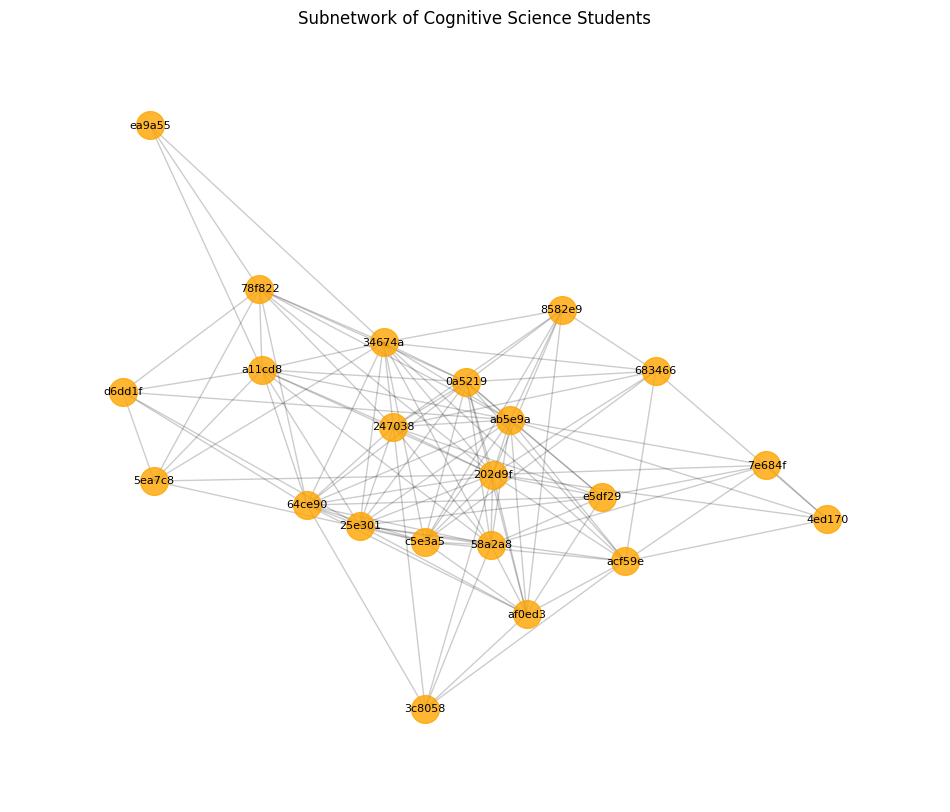

In [71]:
seed =  63
pos = nx.spring_layout(G ,seed=seed)

plt.figure(figsize=(12, 10))
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=400, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

# DRAW LABELS
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Subnetwork of Cognitive Science Students")

# remove a frame
plt.axis('off')

# Adjust plot margins
plt.margins(0.1, 0.1)

plt.show()

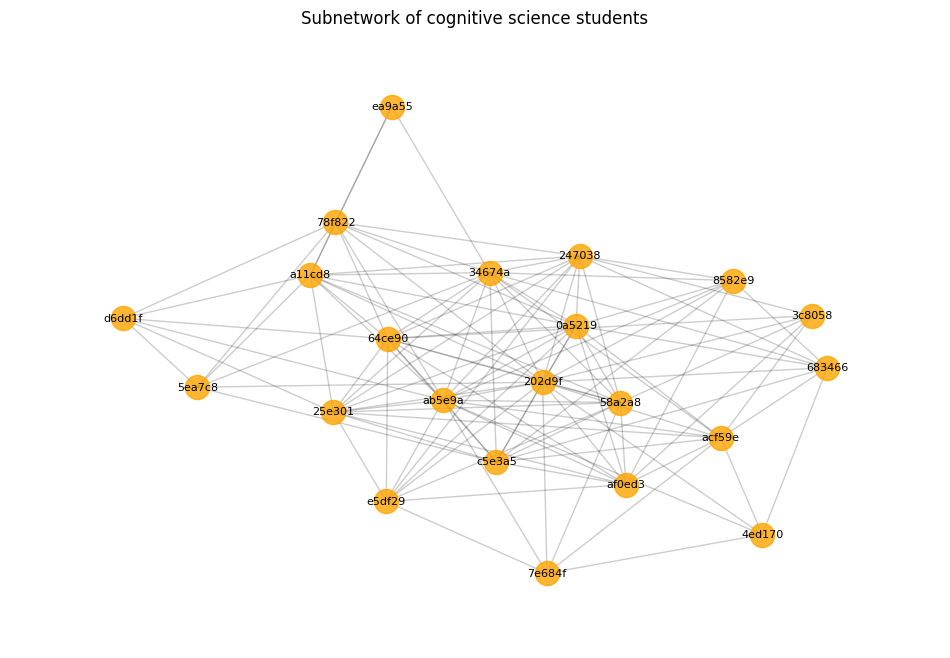

In [ ]:
#kamada_kawai_layout - I think looks promising

pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=300, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

# DRAW LABELS
nx.draw_networkx_labels(G, pos, font_size=8)


plt.title("Subnetwork of cognitive science students")

# remove a frame
plt.axis('off')

# Adjust plot margins
plt.margins(0.1, 0.1)

plt.show()

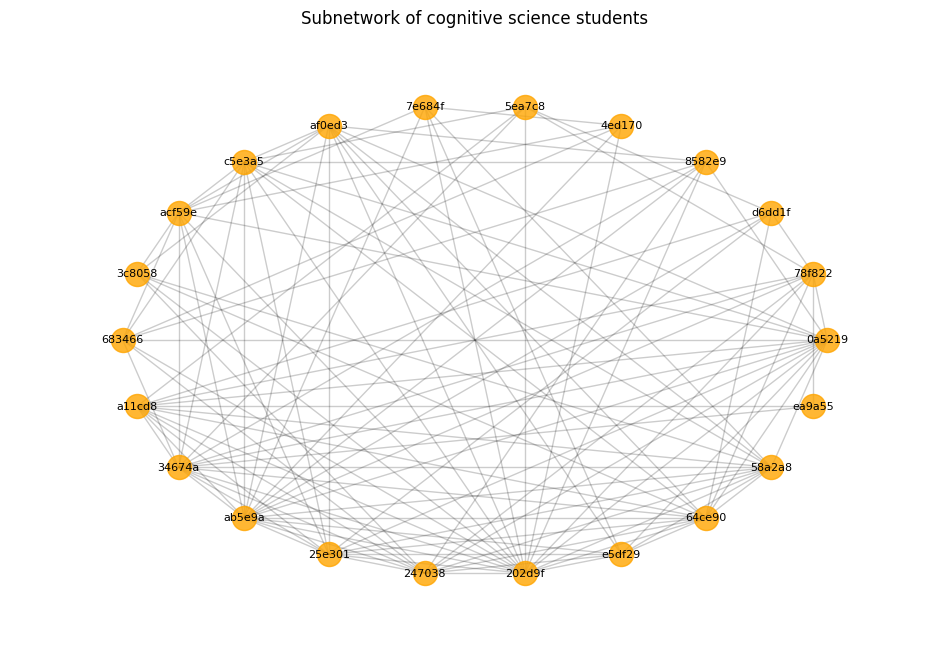

In [ ]:
# shell layout

pos = nx.shell_layout(G)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=300, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

# DRAW LABELS
nx.draw_networkx_labels(G, pos, font_size=8)

# Adjust plot margins
plt.margins(0.1, 0.1)

# remove a frame
plt.axis('off')

plt.title("Subnetwork of cognitive science students")
plt.show()

## Analysis

# 1. Density

The ratio of actual edges in the network to all possible edges in the network. A density value close to 1 indicates a highly connected network, while a value close to 0 indicates a sparsely connected network.

This network's value is 0.50 so it is moderately connected.

In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.5021645021645021


# 2. Clustering coefficient

The clustering coefficient measures the degree to which nodes in a network tend to cluster or form tightly interconnected groups. It provides insights into the local connectivity patterns within the network.

In [ ]:
# Calculate the clustering coefficient for each node
node_clustering = nx.clustering(G)

# Compute the average clustering coefficient for the network
average_clustering = nx.average_clustering(G)

# Print the clustering coefficient for each node
# for node, clustering_coefficient in node_clustering.items():
#     print(f"Node {node}: Clustering Coefficient = {clustering_coefficient}")

print(f"Average Clustering Coefficient: {average_clustering}")

Average Clustering Coefficient: 0.7015681374321958


A higher clustering coefficient indicates a higher tendency for nodes to form clusters and for connections to be present among neighbors.

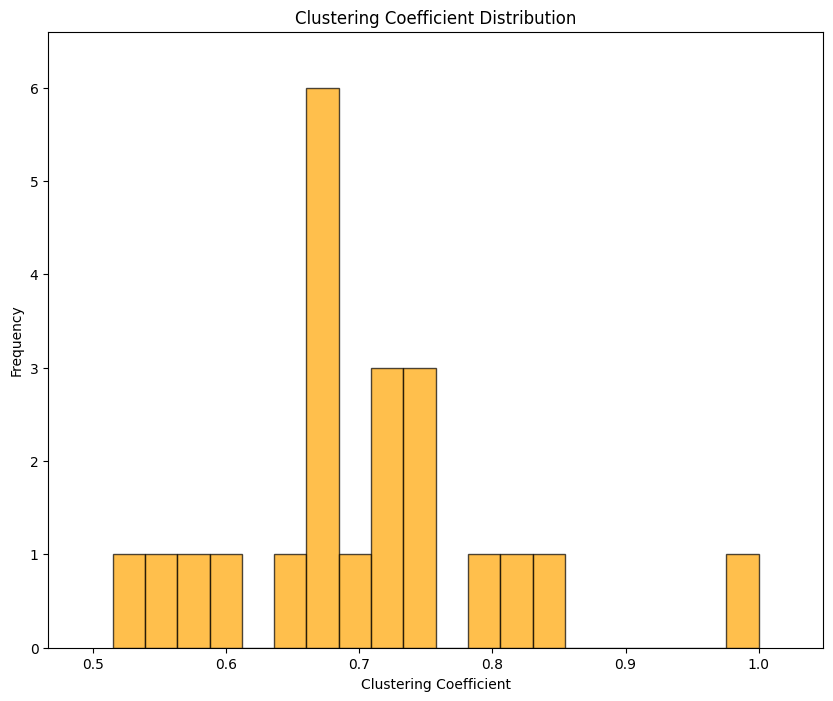

In [ ]:
# Get the clustering coefficients as a list
clustering_coefficients = list(node_clustering.values())

plt.figure(figsize=(10, 8))

# Plot the histogram
plt.hist(clustering_coefficients, bins=20, alpha=0.7, color='orange', edgecolor='black')

plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')


# Adjust plot margins
plt.margins(0.1, 0.1)

plt.title('Clustering Coefficient Distribution')
plt.show()

 An average clustering coefficient of 0.7 indicates a relatively high level of clustering or local connectivity in the network. On average 70% of possible connections between the neigbhors of a node are present in the network. Overall, it means a tendency for the nodes to form tightly interconnected clusters.

Transitivity is the structural measure. It shows how innterconnected a graphs in in terms of a ratio of actual possible connections. Transitivity is the ratio of all triangles over all possible triangles. A possible triangle exists when one person knows two people.

In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.6468315301391035


# 3. degree distribution of a network

Degree distribution refers to the probability distribution of the degrees (number of connections) of nodes in a network.

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", average_degree)

Number of nodes: 22
Number of edges: 116
Average degree: 10.545454545454545


Number of nodes: 22
Number of edges: 116
Average degree is the average number of connections per node in the network. In this network each individual has approximately 10.5 contacts

Degree distribution refers to the probability distribution of the degrees (number of connections) of nodes in a network.

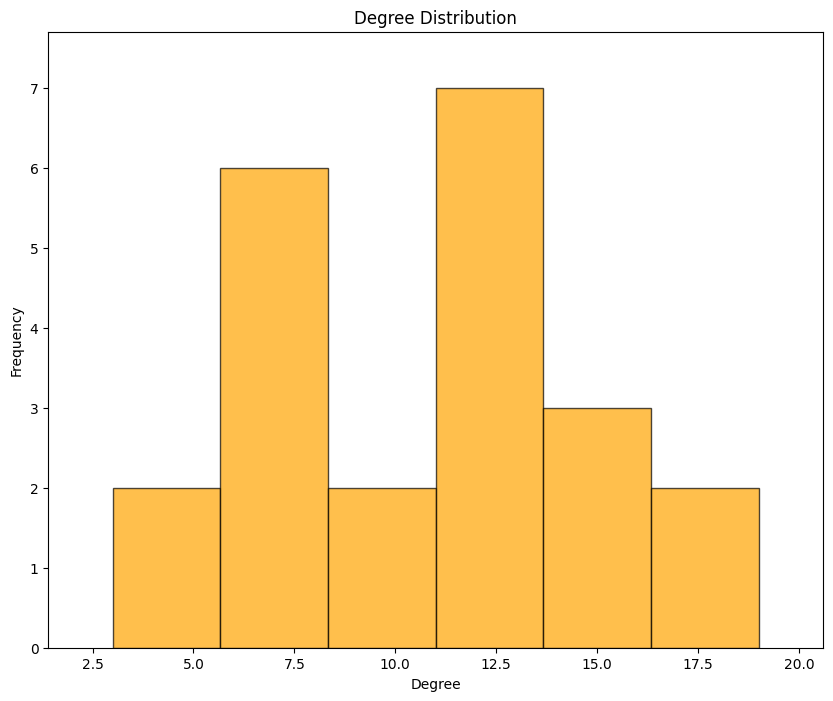

In [ ]:
# Calculate the degree of each node
degrees = [degree for _, degree in G.degree()]

plt.figure(figsize=(10, 8))

# Plot the degree distribution using a histogram
plt.hist(degrees, bins='auto', alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.title('Degree Distribution')
# plt.grid(True)

# Adjust plot margins
plt.margins(0.1, 0.1)


plt.show()

# 4.  Degree Centrality

Centrality measures are used to quantify the importance or influence of individual nodes within a network. They provide insights into the structural significance of nodes based on their connectivity and position within the network.

There are several types of centrality measures, including:

**Degree Centrality**: It measures the number of edges connected to a node. Nodes with higher degree centrality are more connected and influential within the network.

**Betweenness Centrality**: It quantifies the extent to which a node lies on the shortest paths between other pairs of nodes. Nodes with higher betweenness centrality act as bridges or mediators in the network's information flow.

**Closeness Centrality**: It measures how close a node is to all other nodes in the network. Nodes with higher closeness centrality can quickly access information from other nodes and have efficient communication.

**betweenness centrality**

In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

The larger the node size, the higher the betweenness centrality of the node, indicating its importance as a bridge in the network.

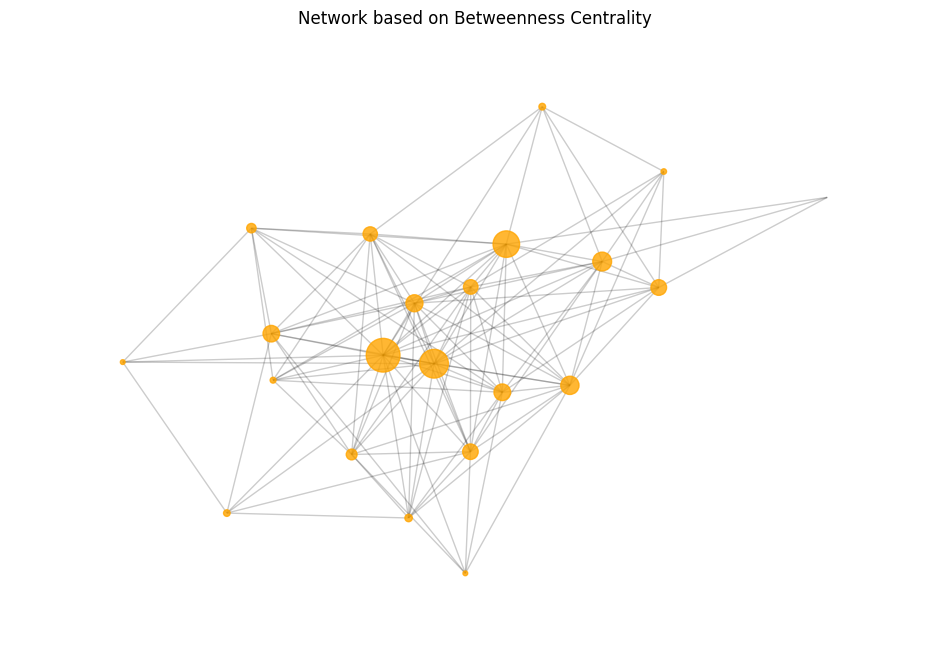

In [ ]:
#seed

seed = 31

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get the betweenness centrality values as a list
centrality_values = list(betweenness_centrality.values())

# Set node size based on betweenness centrality
node_size = [5000 * centrality for centrality in centrality_values]

# Draw the network with node size based on betweenness centrality
pos = nx.spring_layout(G, seed=seed)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=node_size, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title("Network based on Betweenness Centrality")


# Add labels for the 5 biggest nodes
# biggest_nodes = sorted(G.nodes(), key=lambda x: betweenness_centrality[x], reverse=True)[:5]
# node_labels = {node: node for node in biggest_nodes}
# nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')


# remove a frame
plt.axis('off')

# Adjust plot margins
plt.margins(0.1, 0.1)

plt.show()

**Degree Centrality**

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

In [ ]:
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index')

In [ ]:
degree_centrality_df.mean()

0    0.502165
dtype: float64

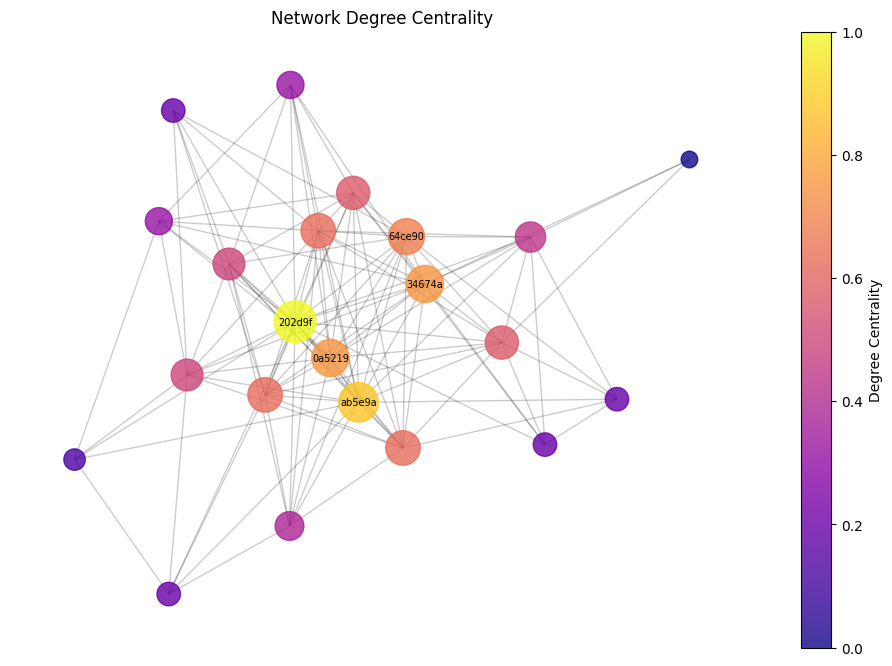

In [ ]:
# seed
seed = 19

# Get the degree centrality values as a list
centrality_values = list(degree_centrality.values())

# Normalize the centrality values to the range [0, 1]
min_centrality = min(centrality_values)
max_centrality = max(centrality_values)
normalized_centrality = [(c - min_centrality) / (max_centrality - min_centrality) for c in centrality_values]

# Set node size based on degree centrality
node_size = [1000 * centrality for centrality in centrality_values]

# Draw the network with node color based on degree centrality
pos = nx.spring_layout(G, seed=seed)

plt.figure(figsize=(12, 8))
nodes = nx.draw_networkx_nodes(G, pos, node_color=normalized_centrality, cmap='plasma', node_size=node_size, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title("Network Degree Centrality")
plt.colorbar(nodes, label='Degree Centrality')

# Add labels for the 5 biggest nodes
biggest_nodes = sorted(G.nodes(), key=lambda x: G.degree(x), reverse=True)[:5]
node_labels = {node: node for node in biggest_nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7, font_color='black')

# remove a frame
plt.axis('off')

plt.show()

In [ ]:
import matplotlib.lines as mlines
import matplotlib.cm as cm

**closeness centrality**

<ipython-input-85-6fdc277cc84d>:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap=plt.cm.plasma), ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], aspect=40)


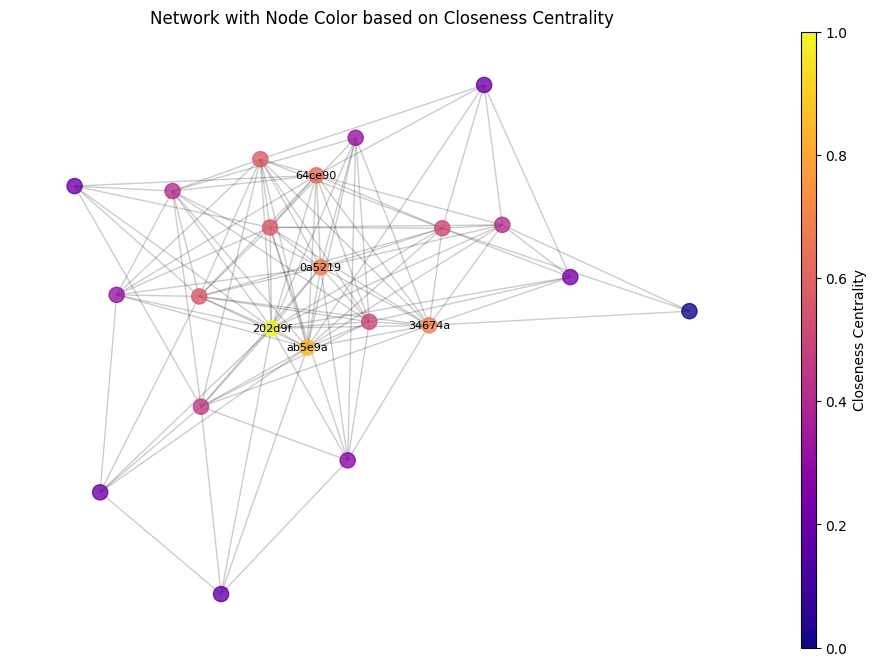

In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the closeness centrality values as a list
centrality_values = list(closeness_centrality.values())

# Normalize the centrality values to the range [0, 1]
min_centrality = min(centrality_values)
max_centrality = max(centrality_values)
normalized_centrality = [(c - min_centrality) / (max_centrality - min_centrality) for c in centrality_values]

# Set node color based on closeness centrality
node_colors = [plt.cm.plasma(c) for c in normalized_centrality]

seed = 60  # Set a fixed seed value

# Draw the network with node color based on closeness centrality
pos = nx.spring_layout(G, seed=seed)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=120, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title("Network with Node Color based on Closeness Centrality")


# Add labels for top 5 central nodes
top_central_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
node_labels = {node: node for node, _ in top_central_nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')

# Create a colorbar legend

cbar = plt.colorbar(cm.ScalarMappable(cmap=plt.cm.plasma), ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], aspect=40)
cbar.set_label('Closeness Centrality')

# remove a frame
plt.axis('off')

plt.show()

maybe I should add attributes for the 4 most central nodes?

# 5. Modularity

Modularity is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. Modularity gives you an overall score of how fractious your network is, and that score can be used to partition the network and return the individual communities.

In [ ]:
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [ ]:
from operator import itemgetter

In [ ]:
communities = community.greedy_modularity_communities(G)

In [ ]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [ ]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: 202d9f | Eigenvector Centrality: 0.32418050368958934
Name: ab5e9a | Eigenvector Centrality: 0.30294318866675496
Name: 0a5219 | Eigenvector Centrality: 0.29041447826955985
Name: c5e3a5 | Eigenvector Centrality: 0.23415083592621574
Name: af0ed3 | Eigenvector Centrality: 0.2172201236073907


In [ ]:
nx.get_node_attributes(G, 'eigenvector')

{'683466': 0.15174919679694734,
 'a11cd8': 0.22304345327961456,
 '34674a': 0.2721571150369829,
 'ab5e9a': 0.30294318866675496,
 '25e301': 0.2603196293906664,
 '247038': 0.25030650407062643,
 '202d9f': 0.32418050368958934,
 'e5df29': 0.1893473790534273,
 '64ce90': 0.26886128275293175,
 '58a2a8': 0.2548506478058678,
 'ea9a55': 0.056323984412264265,
 '0a5219': 0.29041447826955985,
 '78f822': 0.18357094072333677,
 'd6dd1f': 0.112078864842695,
 '8582e9': 0.16953501738048257,
 '4ed170': 0.09038946434544723,
 '5ea7c8': 0.1119536996393933,
 '7e684f': 0.11279681399993091,
 'af0ed3': 0.2172201236073907,
 'c5e3a5': 0.23415083592621574,
 'acf59e': 0.19764377354915366,
 '3c8058': 0.12555115522750843}

In [ ]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['af0ed3', '683466', 'c5e3a5', '202d9f', '8582e9', '0a5219', 'acf59e', '7e684f', 'ab5e9a', '4ed170']
Class 1: ['a11cd8', 'ea9a55', '34674a', '64ce90', '78f822', 'd6dd1f', '5ea7c8']
Class 2: ['247038', '3c8058', 'e5df29', '25e301', '58a2a8']


<ipython-input-92-ca7ff133e35e>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', max(node_colors) + 1)
<ipython-input-92-ca7ff133e35e>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=range(max(node_colors)+1))


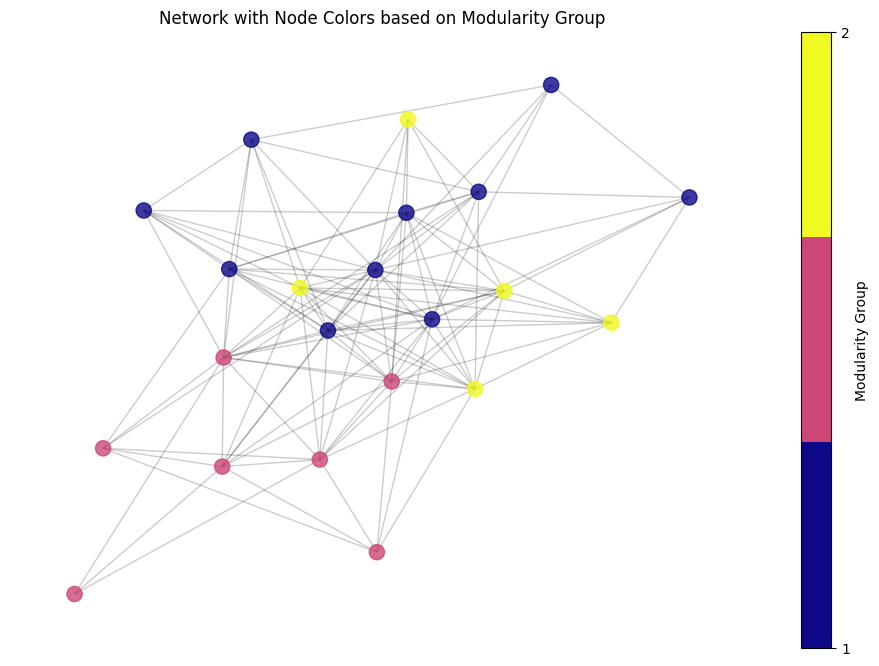

In [ ]:
seed = 50  # Set a fixed seed value
pos = nx.spring_layout(G, seed=seed)   # Choose an appropriate layout for the network
node_colors = [G.nodes[n]['modularity'] for n in G.nodes()]  # Get the modularity group for each node

plt.figure(figsize=(12, 8))


nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='plasma', node_size=120, alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Create a colorbar legend
cmap = plt.cm.get_cmap('plasma', max(node_colors) + 1)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=range(max(node_colors)+1))
cbar.set_ticklabels(range(1, max(node_colors) + 2))
cbar.set_label('Modularity Group')

plt.title("Network with Node Colors based on Modularity Group")

# remove a frame
plt.axis('off')

plt.show()


In [ ]:
from collections import Counter

In [ ]:
# Define the number of top attributes to display for each community
top_attributes_count = 5

# Create a dictionary to store the top attributes for each community
community_attributes = {}

# Iterate over the communities and find the most common attributes
for i, community in enumerate(communities):
    if len(community) > 2:  # Filter out communities with 2 or fewer nodes
        node_attributes = [G.nodes[node] for node in community]
        attribute_counts = Counter(attr for node_attr in node_attributes for attr in node_attr.items())
        top_attributes = attribute_counts.most_common(top_attributes_count)

        community_attributes[i] = [(attribute, value) for (attribute, value), _ in top_attributes]

# Display the attributes for each community
for community, attributes in community_attributes.items():
    print(f"Community {community}:")
    for attribute, value in attributes:
        print(f"- Attribute: {attribute} | Value: {value}")

Community 0:
- Attribute: modularity | Value: 0
- Attribute: year | Value: 1 st
- Attribute: cog1 | Value: No
- Attribute: language | Value: Polish
- Attribute: language | Value: Non-Polish
Community 1:
- Attribute: modularity | Value: 1
- Attribute: year | Value: 2 nd
- Attribute: cog1 | Value: No
- Attribute: language | Value: Non-Polish
- Attribute: language | Value: Polish
Community 2:
- Attribute: language | Value: Polish
- Attribute: modularity | Value: 2
- Attribute: year | Value: 1 st
- Attribute: cog1 | Value: No
- Attribute: cog1 | Value: Yes


In [ ]:
from matplotlib.patches import Patch

<ipython-input-96-33c95a998d2f>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', max(node_colors) + 1)


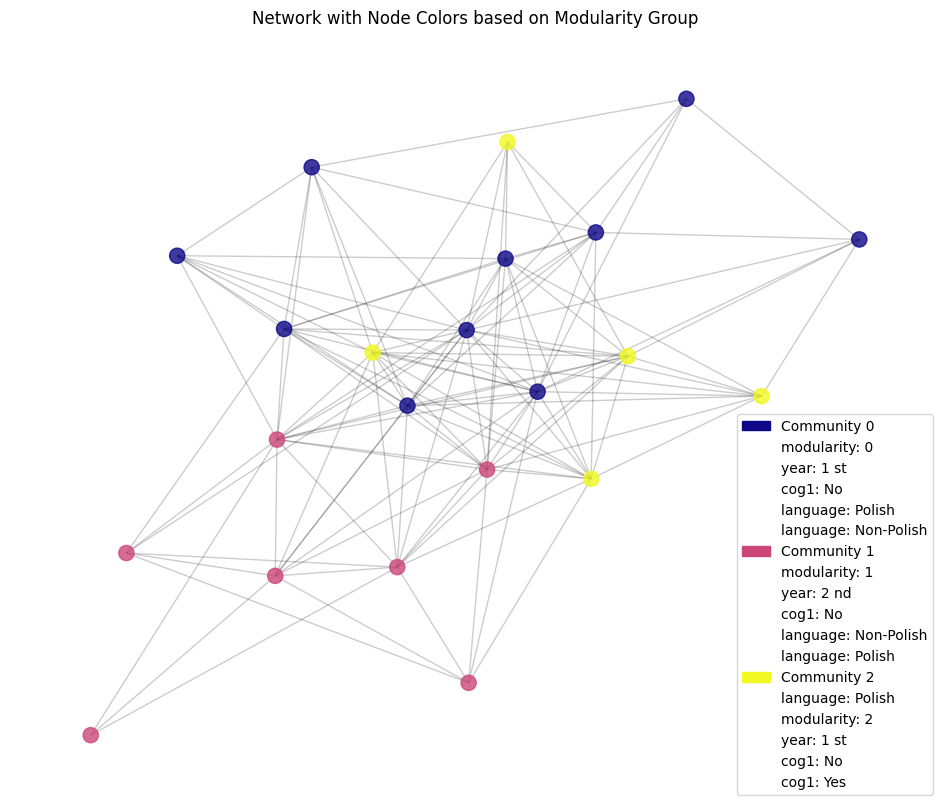

In [ ]:
seed = 50  # Set a fixed seed value
pos = nx.spring_layout(G, seed=seed)  # Choose an appropriate layout for the network
node_colors = [G.nodes[n]['modularity'] for n in G.nodes()]  # Get the modularity group for each node

plt.figure(figsize=(12, 10))

# Create a custom colormap with colors matching the modularity group colors
cmap = plt.cm.get_cmap('plasma', max(node_colors) + 1)
node_color_values = np.array(node_colors) / max(node_colors)
node_colors_mapped = cmap(node_color_values)

nx.draw_networkx_nodes(G, pos, node_color=node_colors_mapped, node_size=120, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title("Network with Node Colors based on Modularity Group")
plt.axis('off')

# Create a legend with attributes and values
legend_elements = []
for community, attributes in community_attributes.items():
    color = cmap(community / max(node_colors))
    legend_elements.append(Patch(label=f"Community {community}", color=color))
    for attribute, value in attributes:
        legend_elements.append(Patch(label=f"{attribute}: {value}", color='white'))

plt.legend(handles=legend_elements, loc='lower right')

plt.show()


# 6. Community detection

Hypothesis:

Based on our initial observations, we posed a hypothesis that Cognitive Science (K2) students are not evenly connected with each other and that there are three aspects that support creating connections:

- Having studied undergraduate cognitive science (K1)
- Speaking Polish as native language / speaking mostly English

In [ ]:
# Remove modularity attribute
# Create an empty dictionary for attribute values
attribute_values = nx.get_node_attributes(G, "modularity")

for key in attribute_values:
  attribute_values[key] = 0

# Set the "modularity" attribute for all nodes to the empty dictionary
nx.set_node_attributes(G, attribute_values, "modularity")

In [ ]:
nx.get_node_attributes(G, "modularity")

{'683466': 0,
 'a11cd8': 0,
 '34674a': 0,
 'ab5e9a': 0,
 '25e301': 0,
 '247038': 0,
 '202d9f': 0,
 'e5df29': 0,
 '64ce90': 0,
 '58a2a8': 0,
 'ea9a55': 0,
 '0a5219': 0,
 '78f822': 0,
 'd6dd1f': 0,
 '8582e9': 0,
 '4ed170': 0,
 '5ea7c8': 0,
 '7e684f': 0,
 'af0ed3': 0,
 'c5e3a5': 0,
 'acf59e': 0,
 '3c8058': 0}

In [ ]:
nx.get_node_attributes(G, "modularity")

{'683466': 0,
 'a11cd8': 0,
 '34674a': 0,
 'ab5e9a': 0,
 '25e301': 0,
 '247038': 0,
 '202d9f': 0,
 'e5df29': 0,
 '64ce90': 0,
 '58a2a8': 0,
 'ea9a55': 0,
 '0a5219': 0,
 '78f822': 0,
 'd6dd1f': 0,
 '8582e9': 0,
 '4ed170': 0,
 '5ea7c8': 0,
 '7e684f': 0,
 'af0ed3': 0,
 'c5e3a5': 0,
 'acf59e': 0,
 '3c8058': 0}

In [ ]:
import community.community_louvain as community_louvain

In [ ]:
partition = community_louvain.best_partition(G)

In [ ]:
nx.set_node_attributes(G, partition, 'community')

In [ ]:
nx.get_node_attributes(G, 'community')

In [ ]:
# Print the detected communities
for node, community_id in partition.items():
    print(f"Node: {node}, Community: {community_id}")

Node: 683466, Community: 0
Node: a11cd8, Community: 1
Node: 34674a, Community: 1
Node: ab5e9a, Community: 0
Node: 25e301, Community: 2
Node: 247038, Community: 2
Node: 202d9f, Community: 0
Node: e5df29, Community: 2
Node: 64ce90, Community: 2
Node: 58a2a8, Community: 2
Node: ea9a55, Community: 1
Node: 0a5219, Community: 0
Node: 78f822, Community: 1
Node: d6dd1f, Community: 1
Node: 8582e9, Community: 0
Node: 4ed170, Community: 0
Node: 5ea7c8, Community: 1
Node: 7e684f, Community: 0
Node: af0ed3, Community: 2
Node: c5e3a5, Community: 0
Node: acf59e, Community: 0
Node: 3c8058, Community: 2


So the community == modularity...

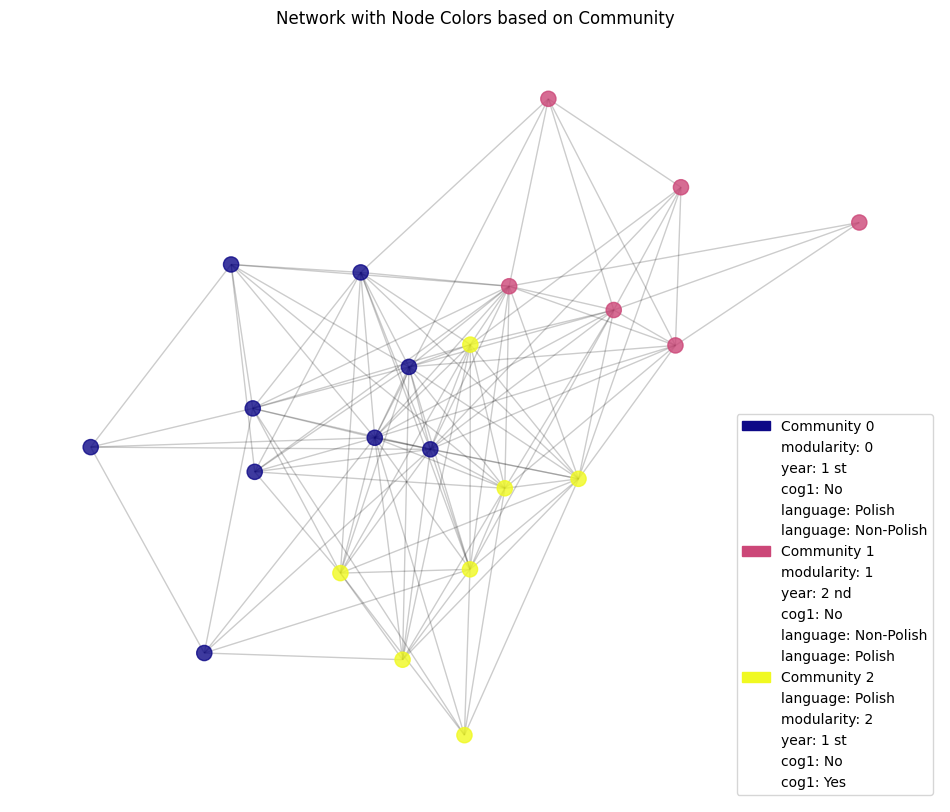

In [ ]:
seed = 31
pos = nx.spring_layout(G, seed=seed)  # Choose a layout for the visualization
node_colors = [partition[node] for node in G.nodes()]  # Get the community assignment for each node

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='plasma', node_size=120, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title("Network with Node Colors based on Community")

# Create a legend with attributes and values
legend_elements = []
for community, attributes in community_attributes.items():
    color = cmap(community / max(node_colors))
    legend_elements.append(Patch(label=f"Community {community}", color=color))
    for attribute, value in attributes:
        legend_elements.append(Patch(label=f"{attribute}: {value}", color='white'))

plt.legend(handles=legend_elements, loc='lower right')


plt.axis('off')
plt.show()

In [ ]:
# Define the number of top attributes to display for each community
top_attributes_count = 5

# Create a dictionary to store the top attributes for each community
community_attributes = {}

# Iterate over the communities and find the most common attributes
for i, community in enumerate(communities):
    if len(community) > 2:  # Filter out communities with 2 or fewer nodes
        node_attributes = [G.nodes[node] for node in community]
        attribute_counts = Counter(attr for node_attr in node_attributes for attr in node_attr.items())
        top_attributes = attribute_counts.most_common(top_attributes_count)

        community_attributes[i] = [(attribute, value) for (attribute, value), _ in top_attributes]

# Display the attributes for each community
for community, attributes in community_attributes.items():
    print(f"Community {community}:")
    for attribute, value in attributes:
        print(f"- Attribute: {attribute} | Value: {value}")

Community 0:
- Attribute: modularity | Value: 0
- Attribute: year | Value: 1 st
- Attribute: community | Value: 0
- Attribute: cog1 | Value: No
- Attribute: language | Value: Polish
Community 1:
- Attribute: modularity | Value: 0
- Attribute: year | Value: 2 nd
- Attribute: cog1 | Value: No
- Attribute: community | Value: 1
- Attribute: language | Value: Non-Polish
Community 2:
- Attribute: language | Value: Polish
- Attribute: modularity | Value: 0
- Attribute: community | Value: 2
- Attribute: year | Value: 1 st
- Attribute: cog1 | Value: No


## Hypothesis testing


1st **People who studied cog-sci BA (yes) will be more connected**

In [ ]:
# Define the hypothesis
hypothesis = "People who studied cog-sci BA (yes) will be more connected"


# Get the attributes for all nodes
language = nx.get_node_attributes(G, 'language')
cog_sci_ba = nx.get_node_attributes(G, 'cog1')

# Extract the subgraph of nodes who studied cog-sci BA (yes)
ba_yes_nodes = [node for node, attr in cog_sci_ba.items() if attr == 'Yes']
subgraph_ba_yes = G.subgraph(ba_yes_nodes)

# Calculate the observed network measure (e.g., average degree)
observed_measure = np.mean([G.degree[node] for node in subgraph_ba_yes])

# Perform permutation test
num_permutations = 1000
permutation_measures = []

for _ in range(num_permutations):
    # Randomly shuffle the attribute values while keeping the network structure intact
    shuffled_ba = np.random.permutation(list(cog_sci_ba.values()))
    shuffled_ba_dict = {node: attr for node, attr in zip(G.nodes(), shuffled_ba)}

    # Create a shuffled network based on the shuffled attribute values
    shuffled_network = nx.Graph(G)
    nx.set_node_attributes(shuffled_network, shuffled_ba_dict, 'cog_sci_ba')

    # Extract the subgraph of nodes who studied cog-sci BA (yes) in the shuffled network
    shuffled_ba_yes_nodes = [node for node, attr in shuffled_network.nodes(data=True) if 'cog_sci_ba' in attr and attr['cog_sci_ba'] == 'Yes']
    shuffled_subgraph_ba_yes = shuffled_network.subgraph(shuffled_ba_yes_nodes)

    # Calculate the measure for the shuffled subgraph
    shuffled_measure = np.mean([shuffled_network.degree[node] for node in shuffled_subgraph_ba_yes])
    permutation_measures.append(shuffled_measure)

# Calculate p-value
p_value = np.mean(np.array(permutation_measures) >= observed_measure)

# Print the results
print(f"Hypothesis: {hypothesis}")
print(f"Observed measure: {observed_measure}")
print(f"Permutation p-value: {p_value}")


Hypothesis: People who studied cog-sci BA (yes) will be more connected
Observed measure: 9.0
Permutation p-value: 0.832


*Observed measure*: The observed measure of 9.0 suggests that there are 9 connections within the subgraph of nodes who studied cog-sci BA (yes) in the original network.

*Permutation p-value*:p-value of 0.82 indicates that in the randomized networks (permutations), the number of connections within the subgraph of nodes who studied cog-sci BA (yes) is equal to or greater than the observed measure in approximately 83% of the permutations.

Therefore, we do not have strong evidence to support the hypothesis that people who studied cog-sci BA (yes) tend to be more connected in the network.

2nd: **Speaking Polish as native language / speaking mostly English**

In [ ]:
polish

{'683466': 'Polish',
 'a11cd8': 'Polish',
 '34674a': 'Non-Polish',
 'ab5e9a': 'Non-Polish',
 '25e301': 'Polish',
 '247038': 'Polish',
 '202d9f': 'Non-Polish',
 'e5df29': 'Polish',
 '64ce90': 'Non-Polish',
 '58a2a8': 'Polish',
 'ea9a55': 'Non-Polish',
 '0a5219': 'Non-Polish',
 '78f822': 'Polish',
 'd6dd1f': 'Polish',
 '8582e9': 'Polish',
 '4ed170': 'Polish',
 '5ea7c8': 'Non-Polish',
 '7e684f': 'Polish',
 'af0ed3': 'Polish',
 'c5e3a5': 'Polish',
 'acf59e': 'Polish',
 '3c8058': 'Polish'}

In [ ]:
# Define the hypothesis
hypothesis = "People speaking Polish as native language will be more connected"

# Get the attributes for all nodes
polish = nx.get_node_attributes(G, 'language')

# Extract the subgraph of nodes who studied cog-sci BA (yes)
polish_yes_nodes = [node for node, attr in polish.items() if attr == 'Polish']
subgraph_polish_yes = G.subgraph(polish_yes_nodes)

# Calculate the observed network measure (e.g., average degree)
observed_measure = np.mean([G.degree[node] for node in subgraph_polish_yes])

# Perform permutation test
num_permutations = 1000
permutation_measures = []

for _ in range(num_permutations):
    # Randomly shuffle the attribute values while keeping the network structure intact
    shuffled_polish = np.random.permutation(list(polish.values()))
    shuffled_polish_dict = {node: attr for node, attr in zip(G.nodes(), shuffled_polish)}

    # Create a shuffled network based on the shuffled attribute values
    shuffled_network = nx.Graph(G)
    nx.set_node_attributes(shuffled_network, shuffled_polish_dict, 'language')

    # Extract the subgraph of nodes who studied cog-sci BA (yes) in the shuffled network
    shuffled_polish_yes_nodes = [node for node, attr in shuffled_network.nodes(data=True) if
                             'language' in attr and attr['language'] == 'Polish']
    shuffled_subgraph_polish_yes = shuffled_network.subgraph(shuffled_polish_yes_nodes)

    # Calculate the measure for the shuffled subgraph

    shuffled_measure = np.mean([shuffled_network.degree[node] for node in shuffled_subgraph_polish_yes])
    permutation_measures.append(shuffled_measure)

# Calculate p-value
p_value = np.mean(np.array(permutation_measures) >= observed_measure)

# Print the results
print(f"Hypothesis: {hypothesis}")
print(f"Observed measure: {observed_measure}")
print(f"Permutation p-value: {p_value}")

Hypothesis: People speaking Polish as native language will be more connected
Observed measure: 9.533333333333333
Permutation p-value: 0.951


*Observed measure*: The observed measure of 9.533 suggests that there is a higher level of connectivity within the subgraph of nodes who speak Polish as their native language in the original network.

*Permutation p-value*: The permutation p-value of 0.951 indicates that in the randomized networks (permutations), the level of connectivity within the subgraph of nodes who speak Polish as their native language is greater than 0.05, so this is not sufficient to reject the null hypothesis.
We cannot conclude that people speaking Polish are more connected in the network.

# 4. INFORMATION FLOW

## 7. Information flow

https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7

Information diffusion process may resemble a viral spread of a disease. In the Independent Cascade model, each of the node’s active neighbors has a probabilistic and independent chance to activate the node.

One node is set as "infected" and able to spread, in this case, the information. Because this social network edges are non directional, any node that is a neighbor of an "infected" node has an equal chance to receive, the information.


Eigenvector centrality is a measure of the influence or importance of a node in a network. It assigns a score to each node based on the concept that connections to high-scoring nodes contribute more to the score of a node. Nodes with higher eigenvector centrality are considered more influential in the network.

We decided to run 4 simulations, the choice of the first infected node was accordingly to its influence in the network. The measurement of which is the Eigenvector Cenrality.

Name: 58a2a8 | Eigenvector Centrality: 0.25

Name: c5e3a5 | Eigenvector Centrality: 0.23

Name: 3c8058 | Eigenvector Centrality: 0.12

Name: ab5e9a | Eigenvector Centrality: 0.30

In [ ]:
def independent_cascade(G, t, infection_times):
    # Doing a t -> t+1 step of independent cascade simulation
    # Each infectious node infects neighbors with a constant infection probability

    # Define the infection probability
    infection_prob = 0.4

    current_infectious = [n for n in infection_times if infection_times[n] == t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if np.random.random() <= infection_prob:
                    infection_times[v] = t + 1

    return infection_times

# Initialize infection in the specific node
infection_times = {'58a2a8':1}




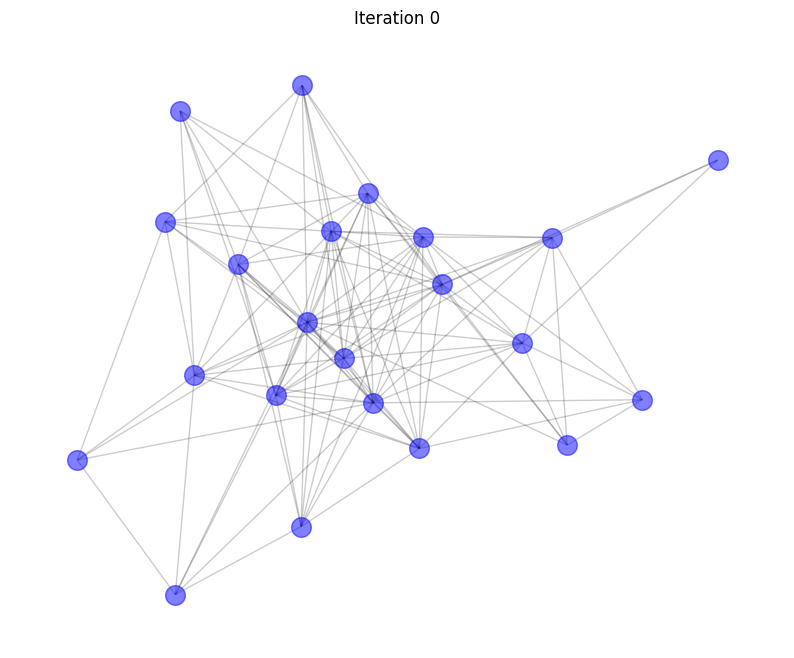

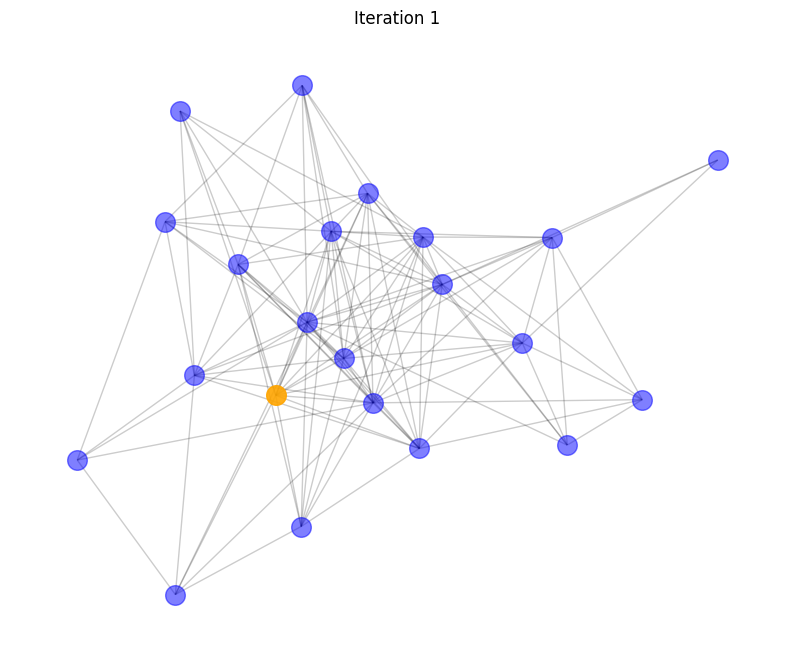

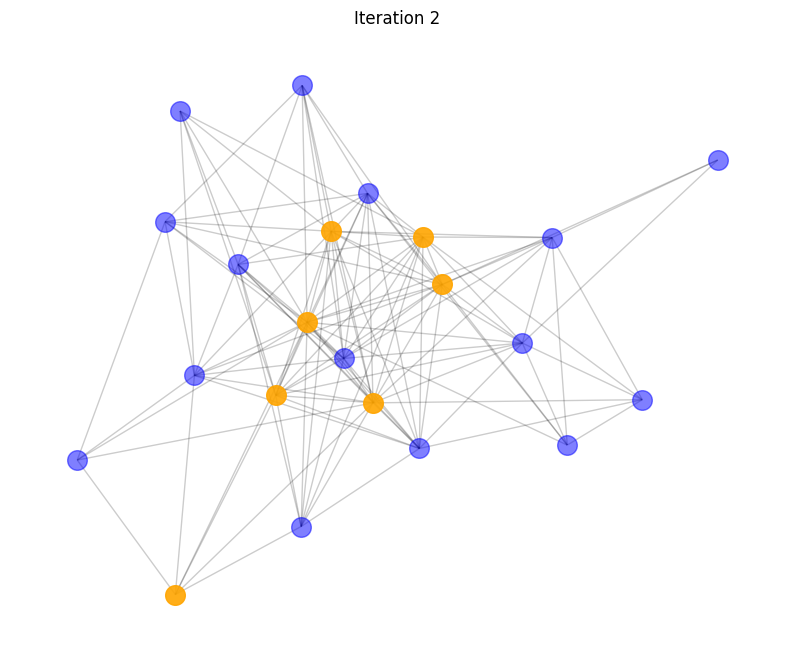

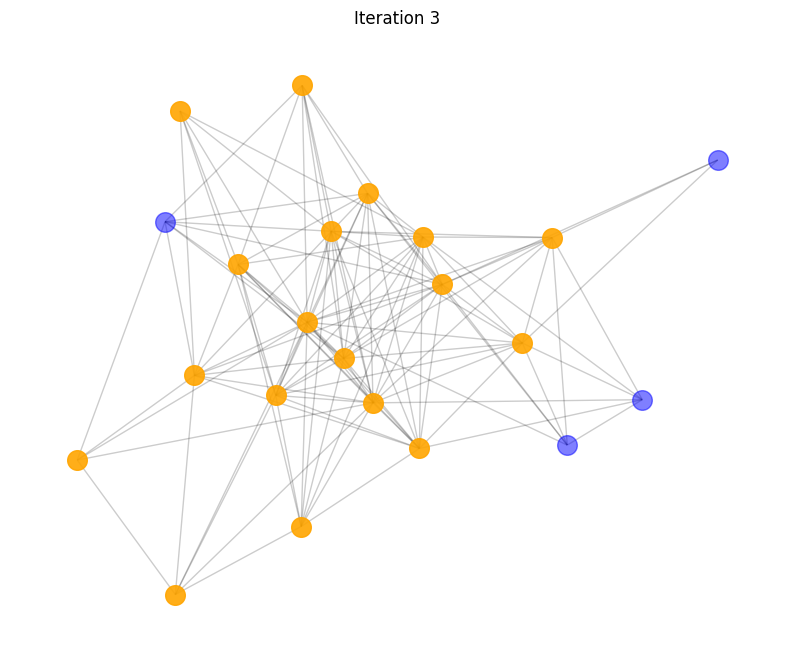

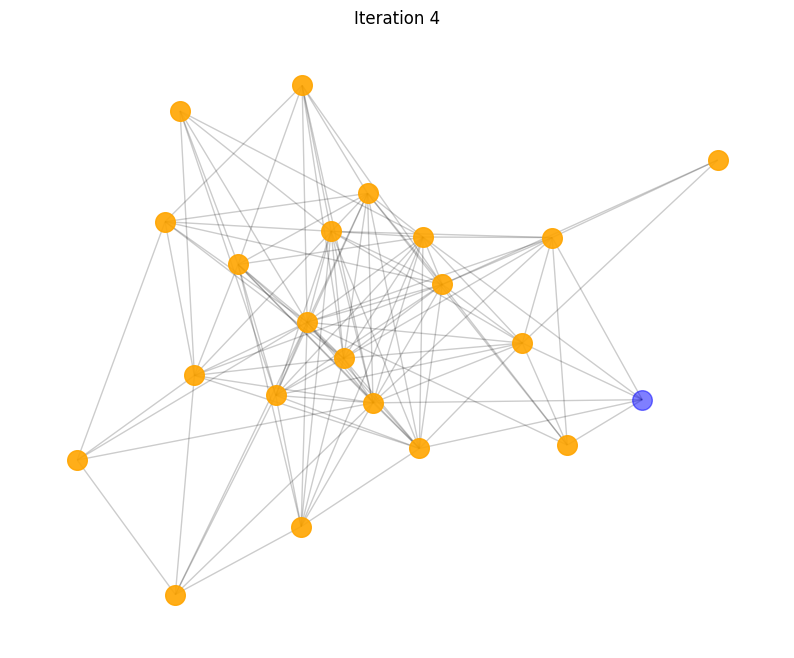

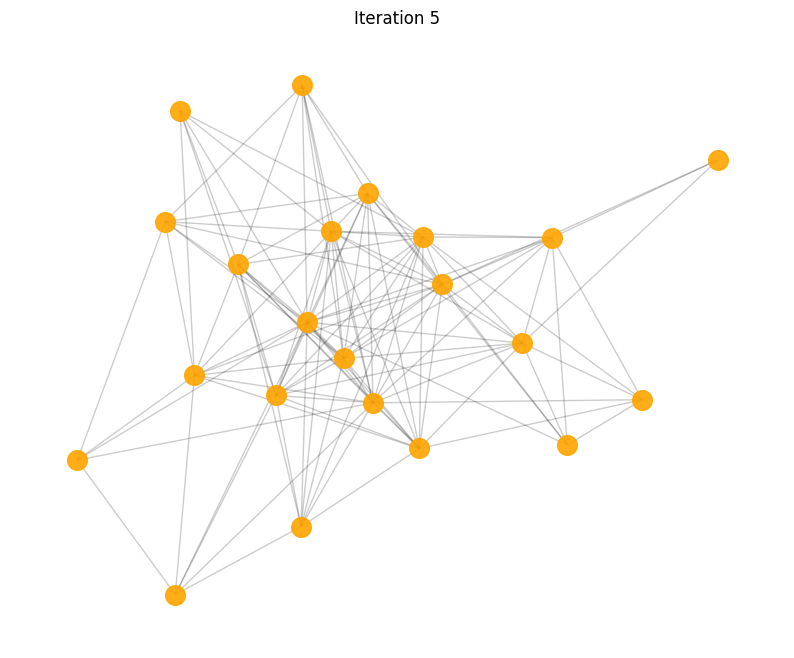

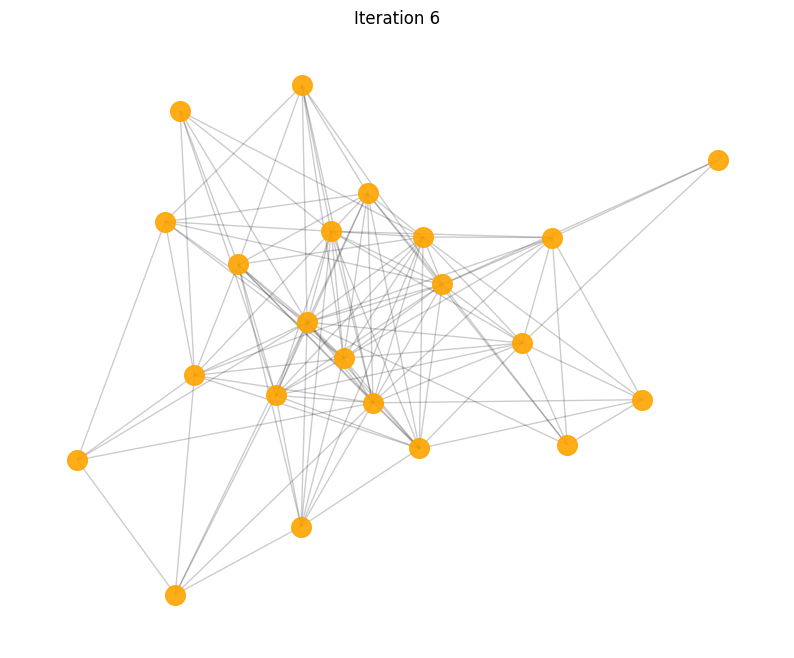

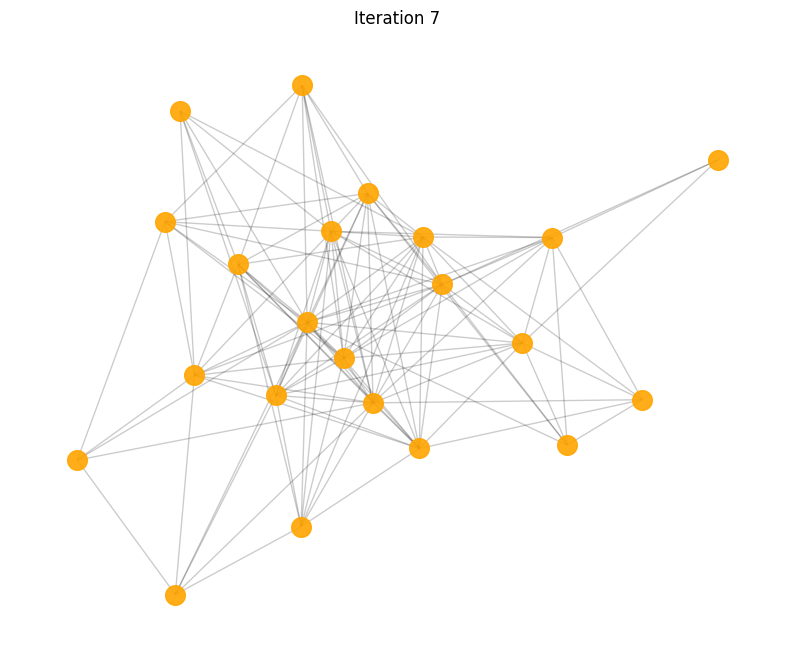

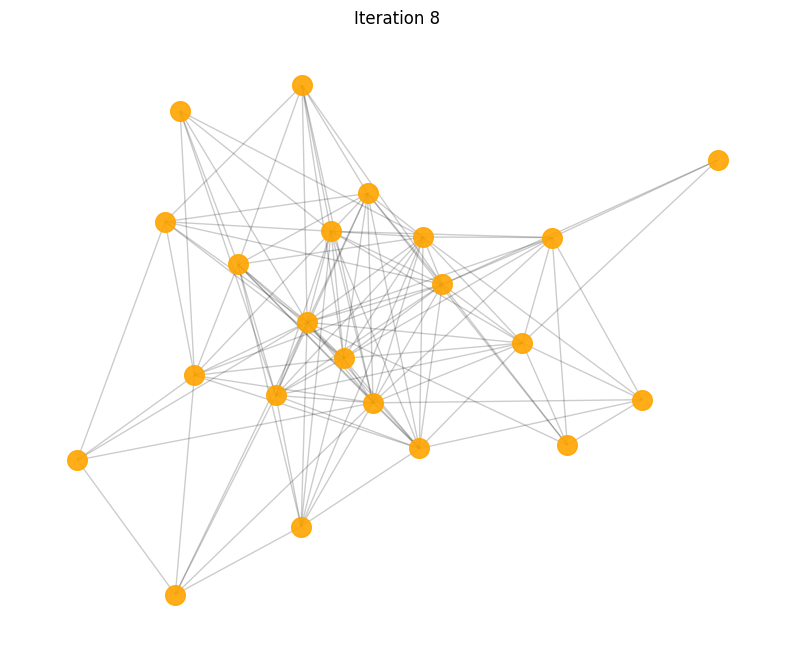

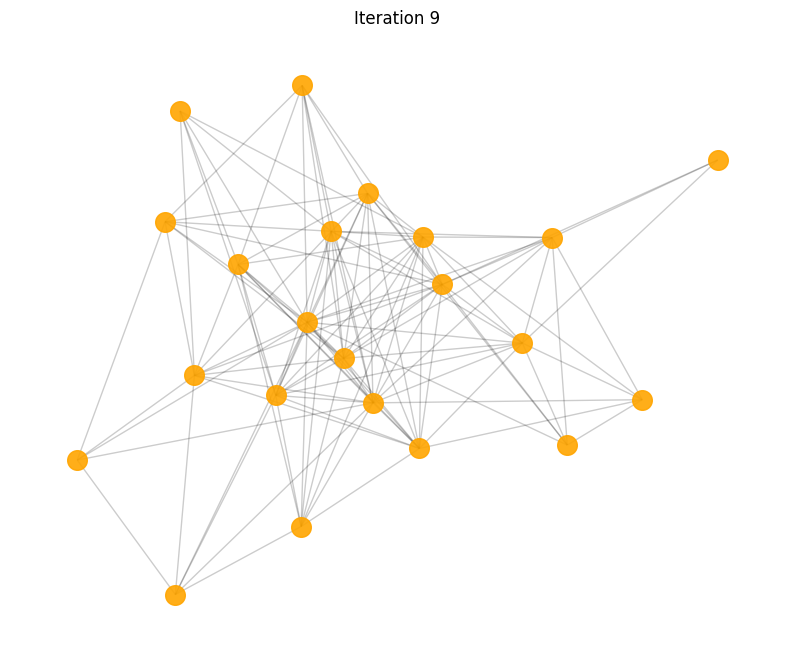

In [ ]:
for t in range(10):

    infection_times = independent_cascade(G, t, infection_times)

    # Visualize the spread of infection
    seed=19
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=seed)
    infected_nodes = [n for n in infection_times if infection_times[n] <= t]
    susceptible_nodes = [n for n in G.nodes() if n not in infected_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='orange', alpha=0.9, node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible_nodes, node_color='blue', alpha=0.5, node_size=200)

    nx.draw_networkx_edges(G, pos, alpha=0.2)
    # nx.draw_networkx_labels(G, pos, font_color='black')

    plt.title(f"Iteration {t}")
    plt.axis('off')
    plt.show()









In [ ]:
def independent_cascade(G, t, infection_times):
    # Doing a t -> t+1 step of independent cascade simulation
    # Each infectious node infects neighbors with a constant infection probability

    # Define the infection probability
    infection_prob = 0.4

    current_infectious = [n for n in infection_times if infection_times[n] == t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if np.random.random() <= infection_prob:
                    infection_times[v] = t + 1

    return infection_times


infection_times = {'3c8058':1}

# Initialize infection in the specific node
# infection_times = {initial_infected: 0}

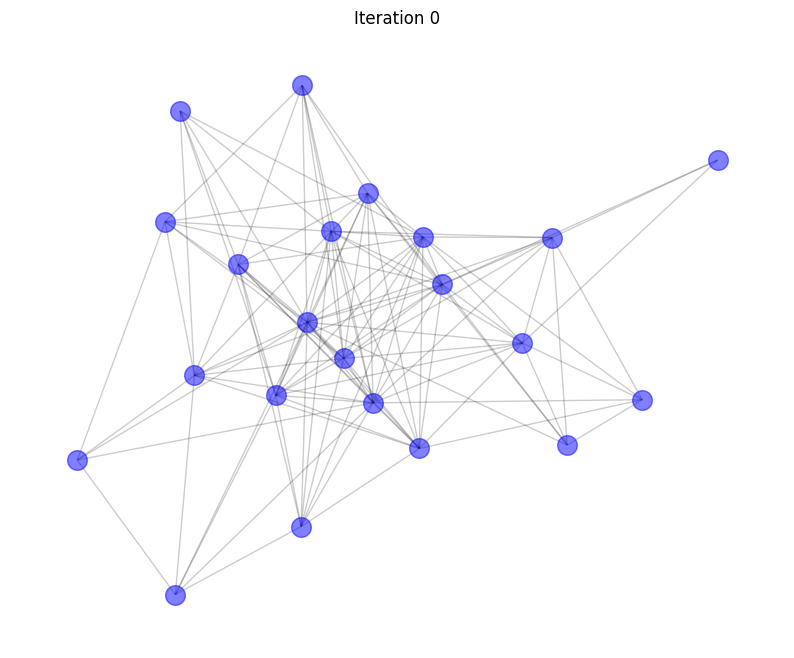

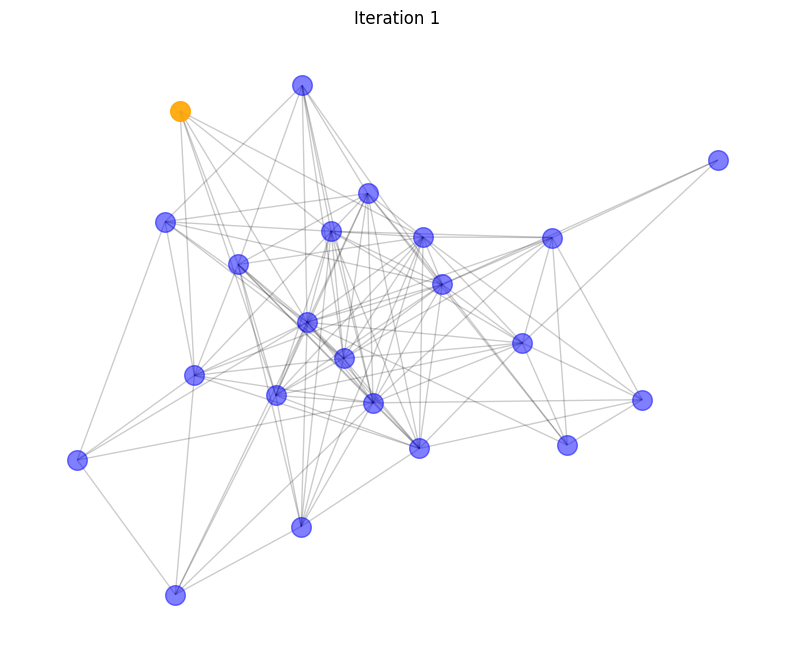

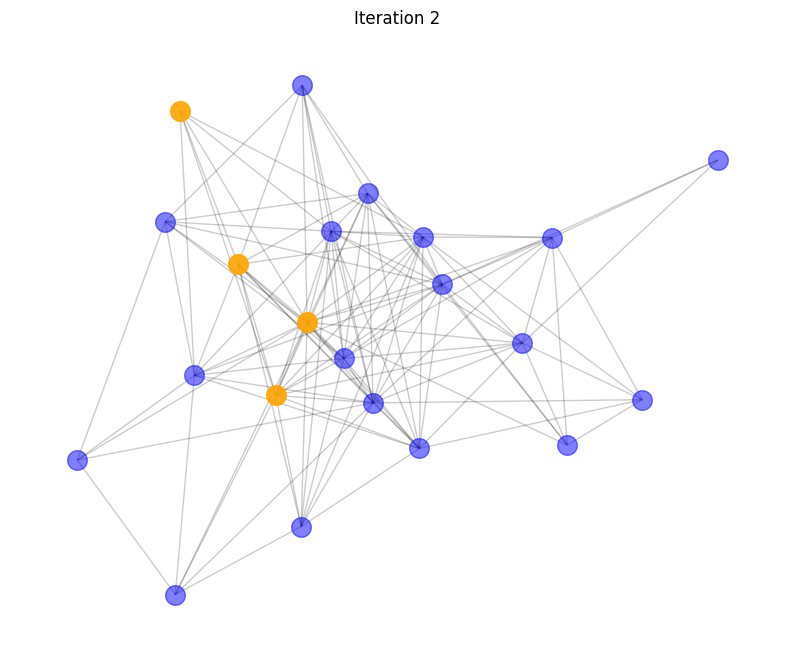

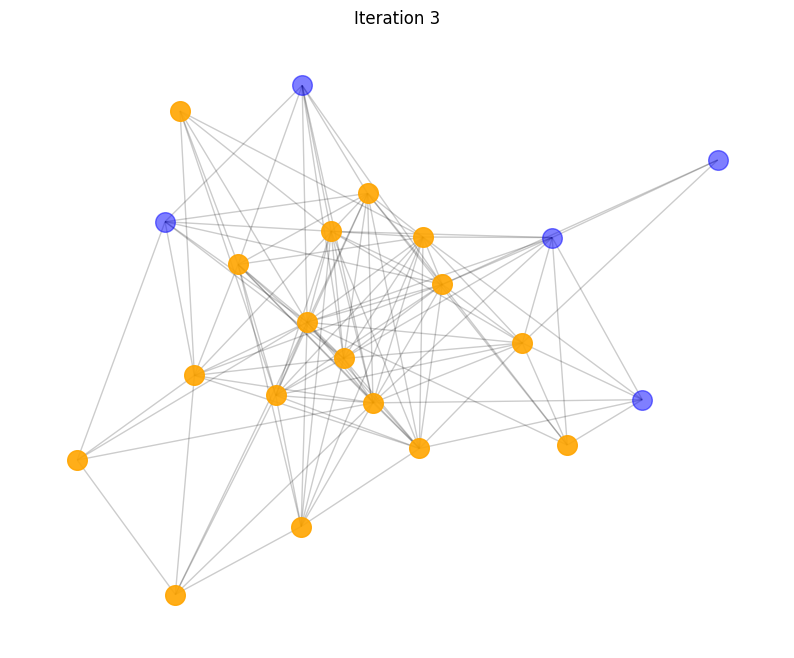

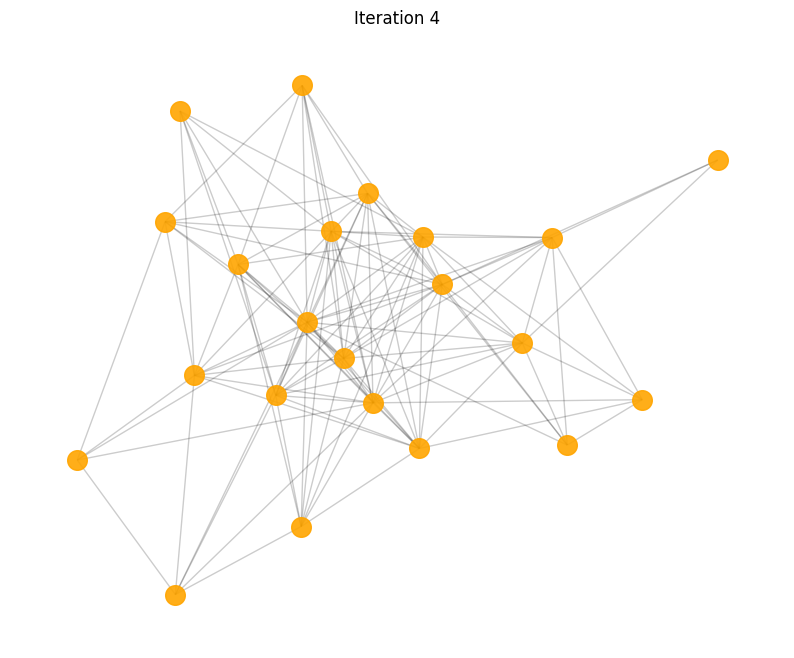

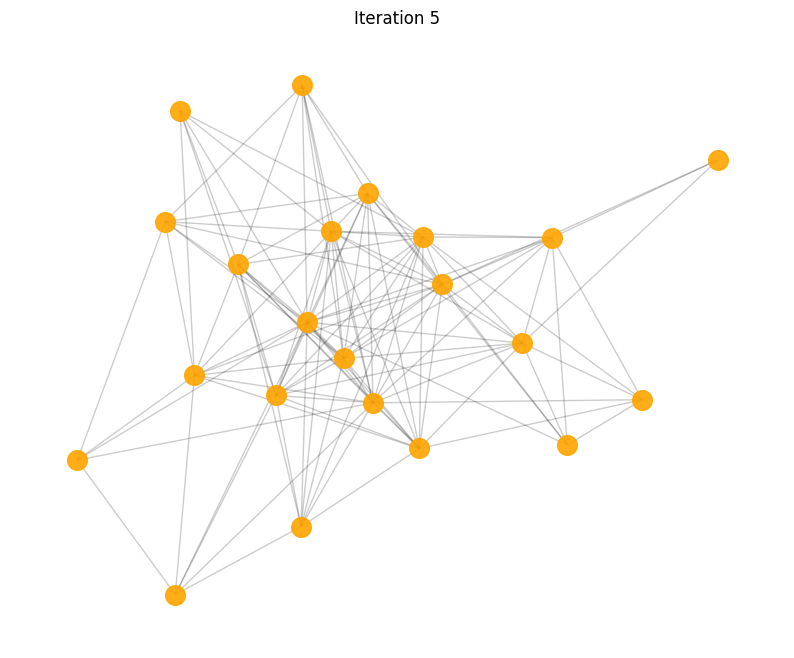

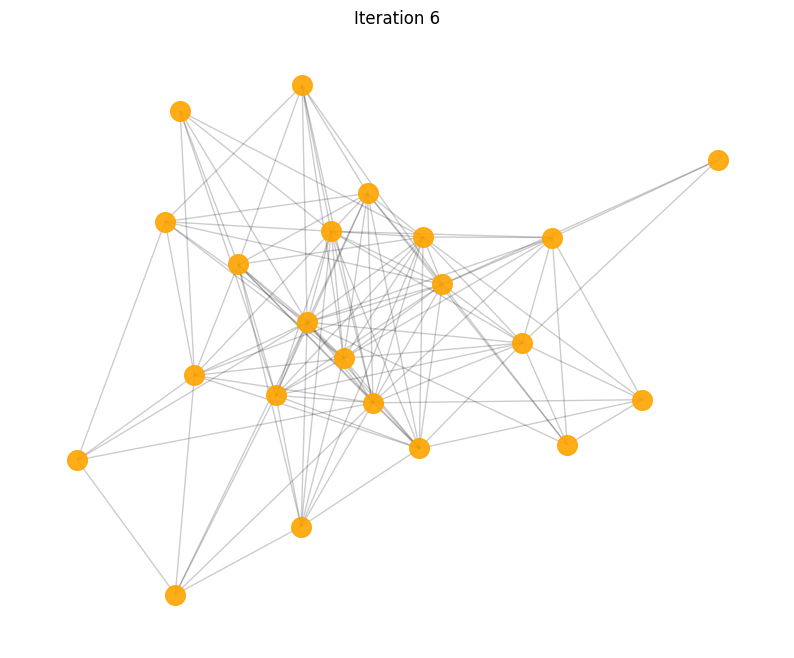

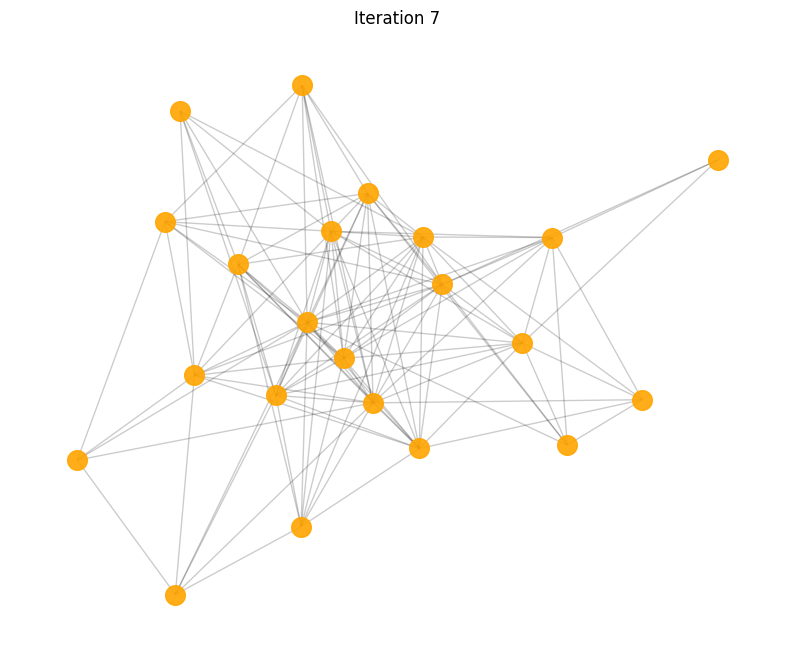

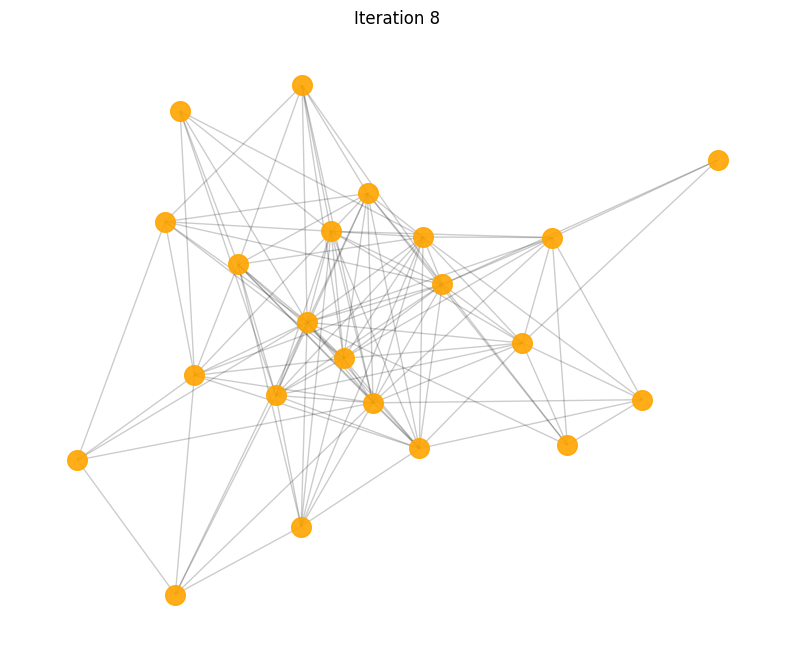

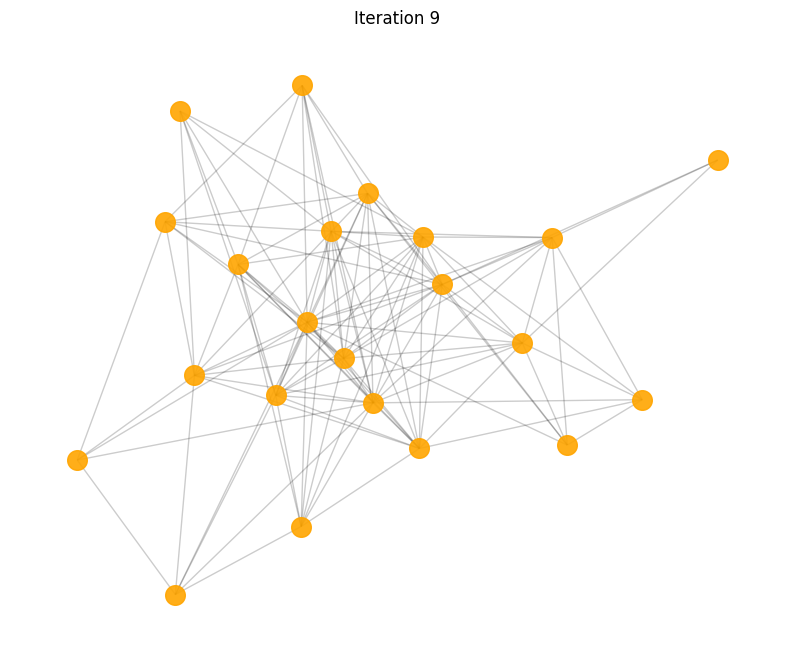

In [ ]:
for t in range(10):

    infection_times = independent_cascade(G, t, infection_times)

    # Visualize the spread of infection
    seed=19
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=seed)
    infected_nodes = [n for n in infection_times if infection_times[n] <= t]
    susceptible_nodes = [n for n in G.nodes() if n not in infected_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='orange', alpha=0.9, node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible_nodes, node_color='blue', alpha=0.5, node_size=200)

    # nx.draw_networkx_labels(G, pos, font_color='black')
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.title(f"Iteration {t}")
    plt.axis('off')
    plt.show()

In [ ]:
def independent_cascade(G, t, infection_times):
    # Doing a t -> t+1 step of independent cascade simulation
    # Each infectious node infects neighbors with a constant infection probability

    # Define the infection probability
    infection_prob = 0.4

    current_infectious = [n for n in infection_times if infection_times[n] == t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if np.random.random() <= infection_prob:
                    infection_times[v] = t + 1

    return infection_times


infection_times = {'c5e3a5':1}

# Initialize infection in the specific node
# infection_times = {initial_infected: 0}

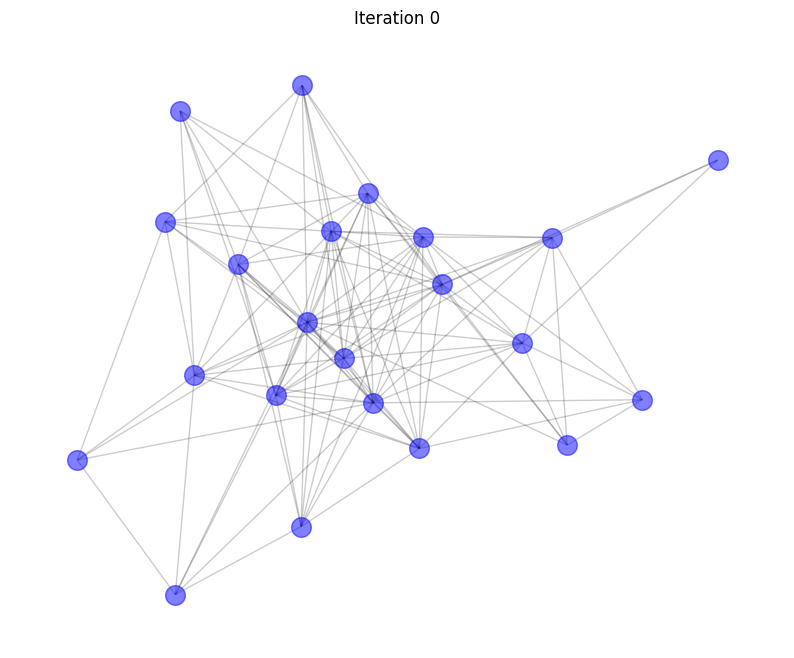

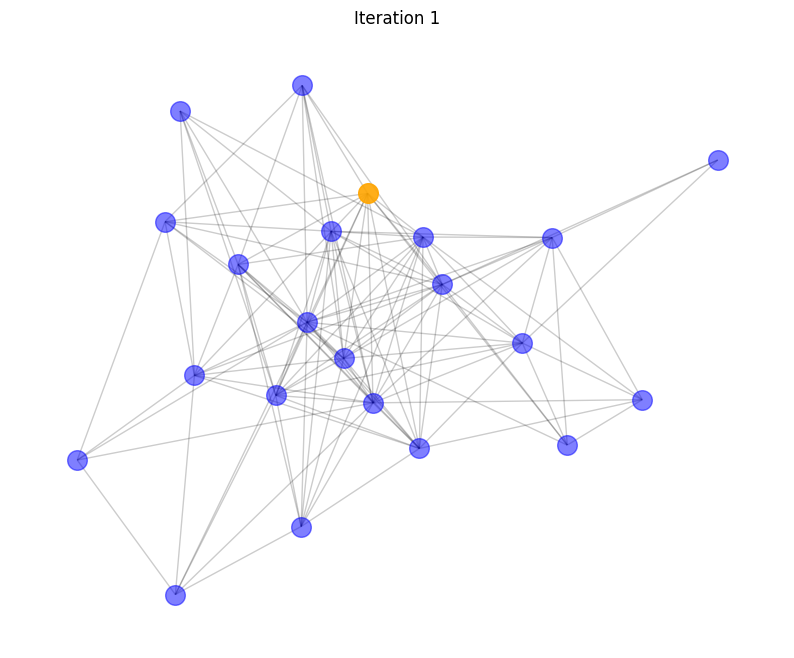

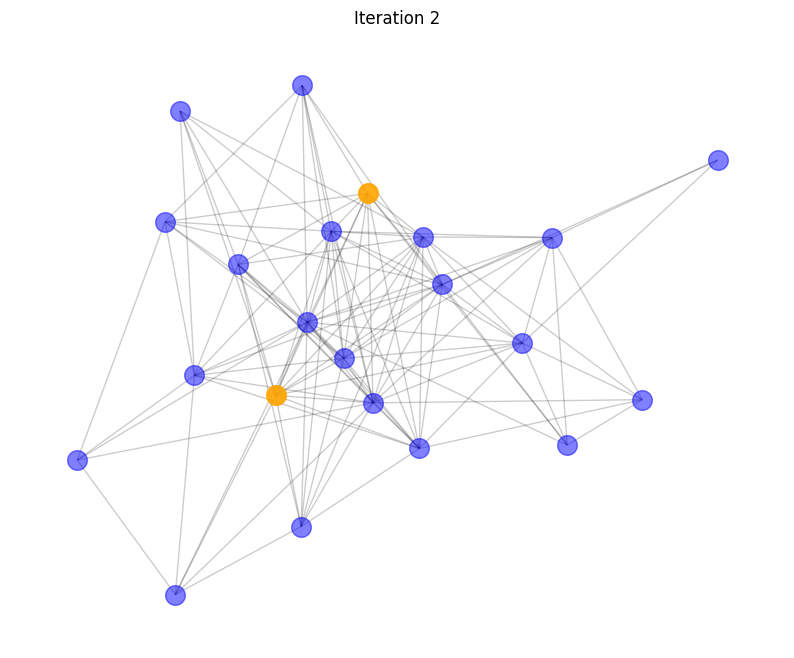

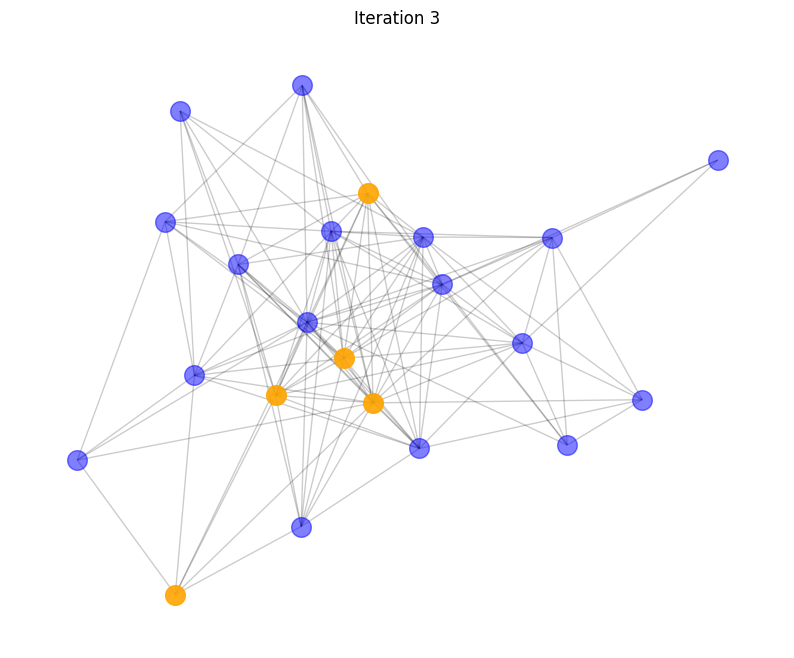

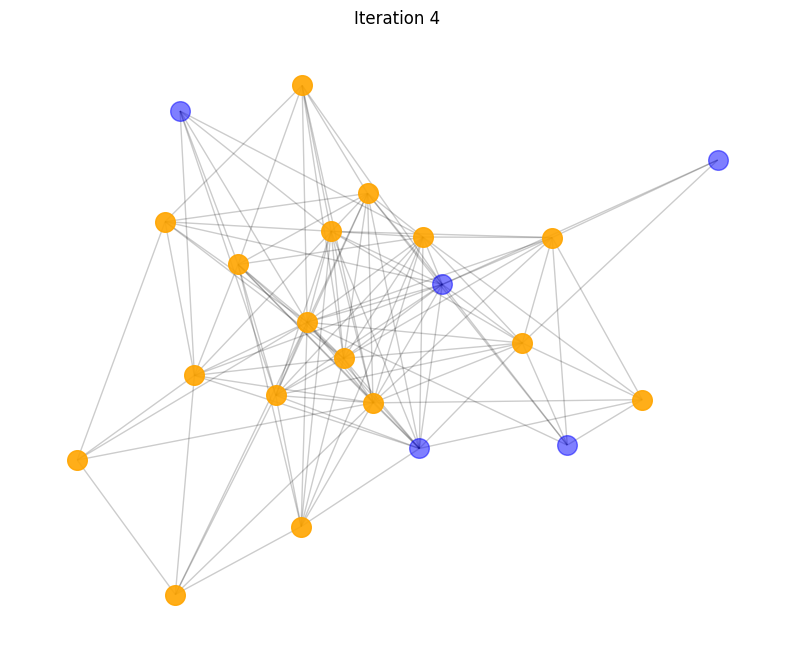

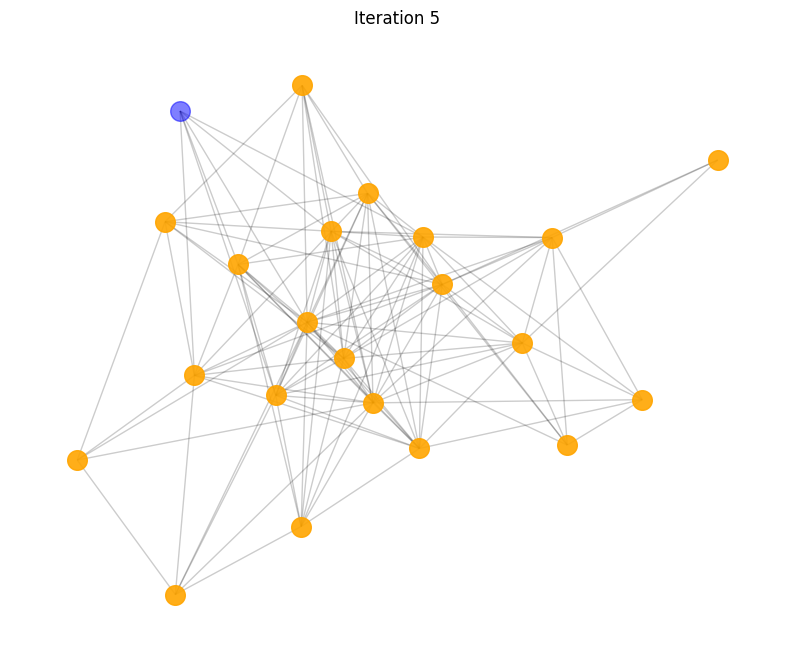

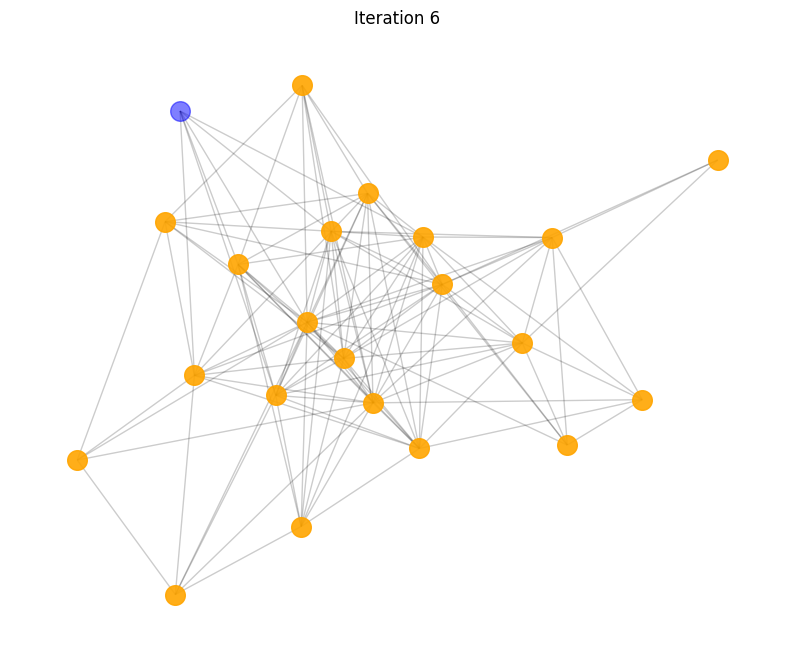

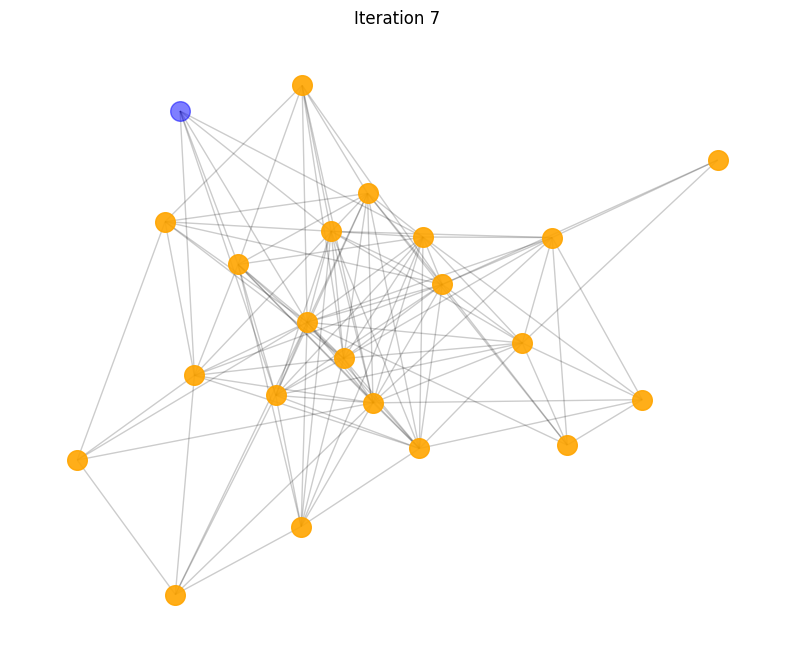

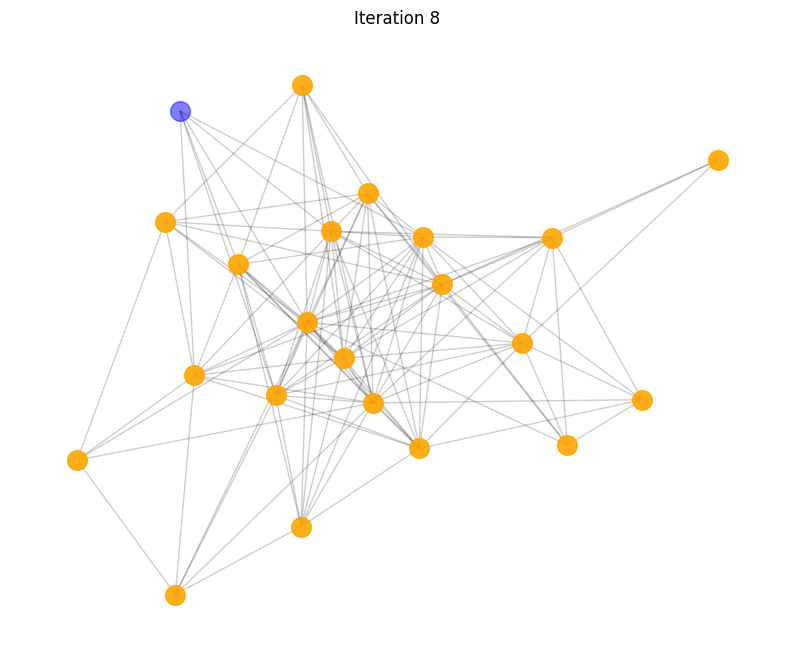

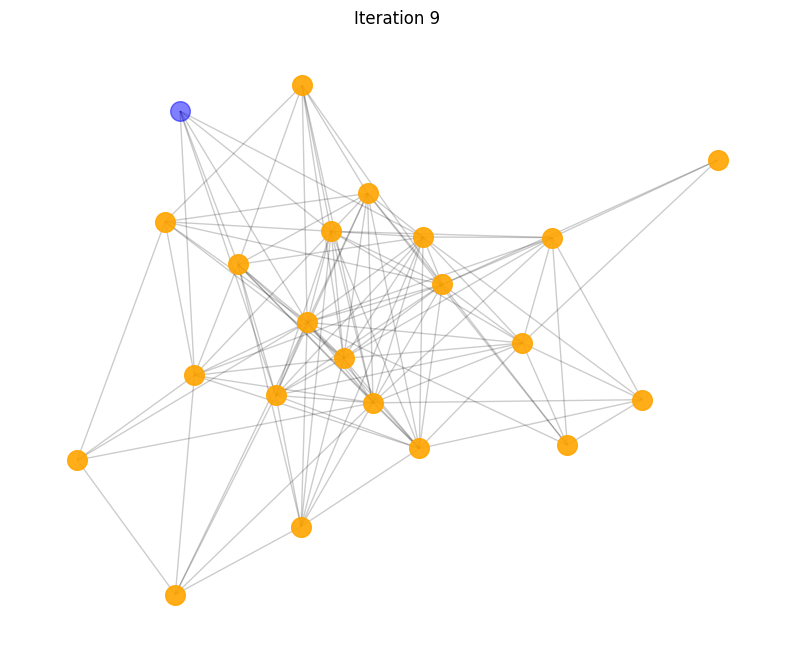

In [ ]:
for t in range(10):

    infection_times = independent_cascade(G, t, infection_times)

    # Visualize the spread of infection
    seed=19
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=seed)
    infected_nodes = [n for n in infection_times if infection_times[n] <= t]
    susceptible_nodes = [n for n in G.nodes() if n not in infected_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='orange', alpha=0.9, node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible_nodes, node_color='blue', alpha=0.5, node_size=200)

    # nx.draw_networkx_labels(G, pos, font_color='black')
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.title(f"Iteration {t}")
    plt.axis('off')
    plt.show()

In [ ]:
def independent_cascade(G, t, infection_times):
    # Doing a t -> t+1 step of independent cascade simulation
    # Each infectious node infects neighbors with a constant infection probability

    # Define the infection probability
    infection_prob = 0.4

    current_infectious = [n for n in infection_times if infection_times[n] == t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if np.random.random() <= infection_prob:
                    infection_times[v] = t + 1

    return infection_times

# Initialize infection in the specific node
infection_times = {'ab5e9a':1}


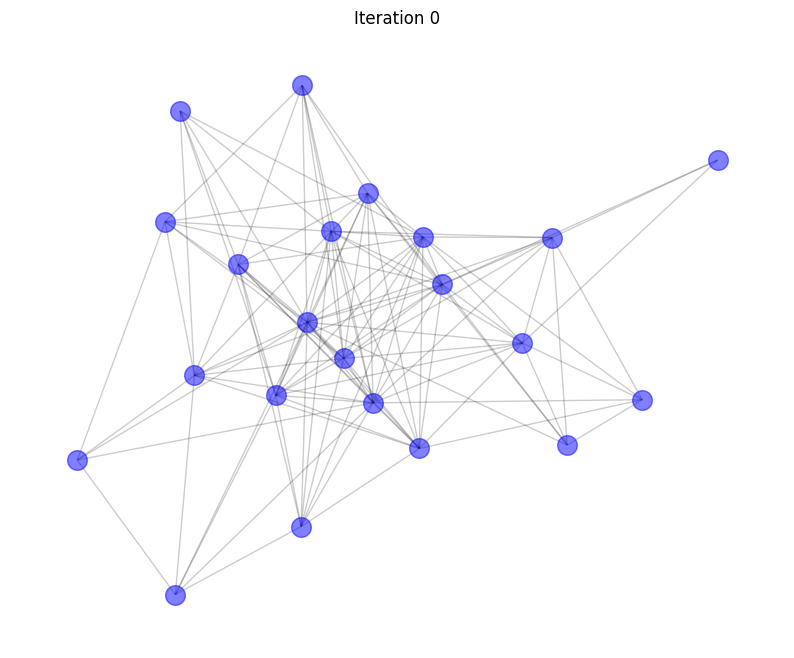

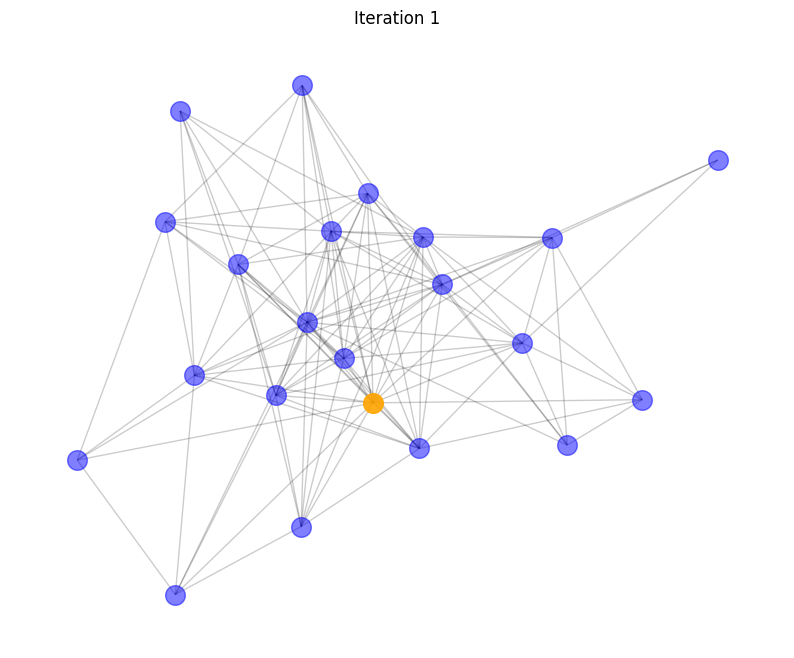

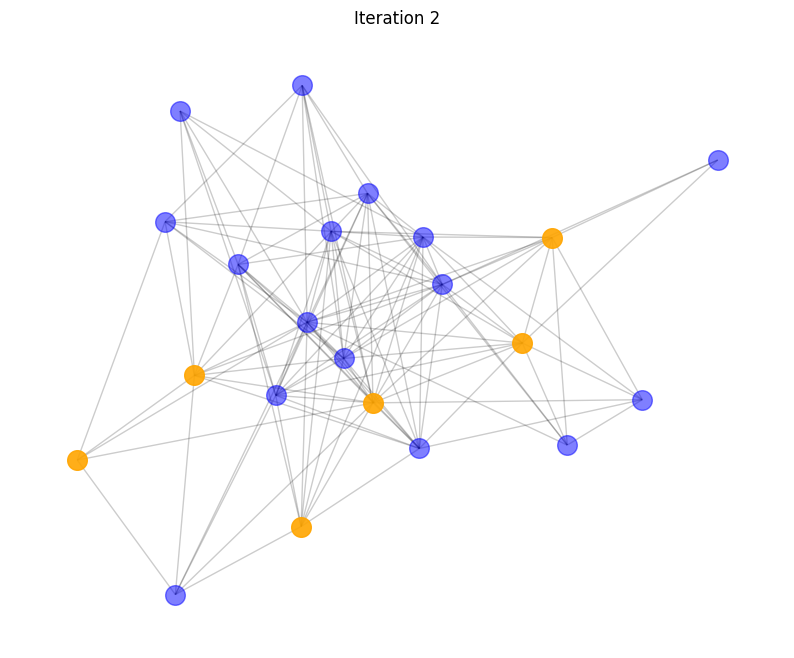

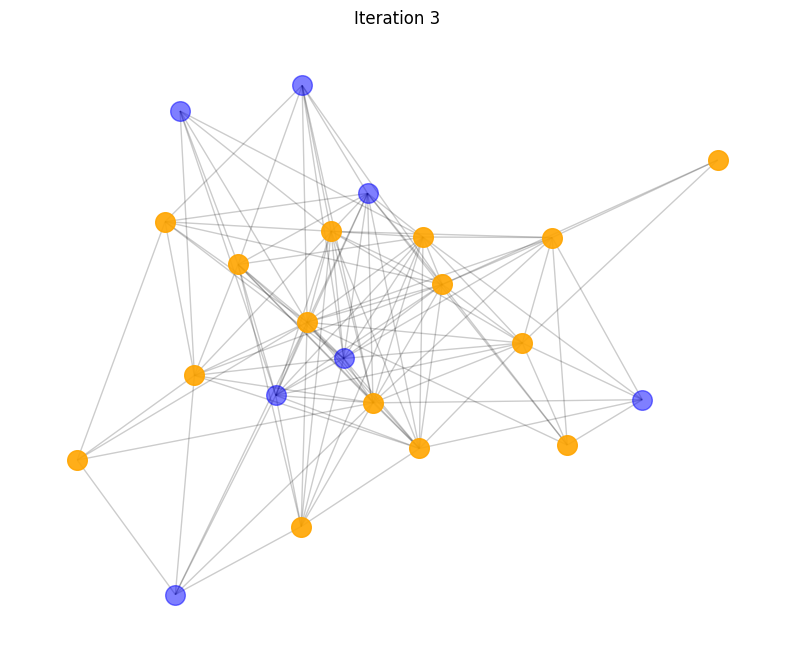

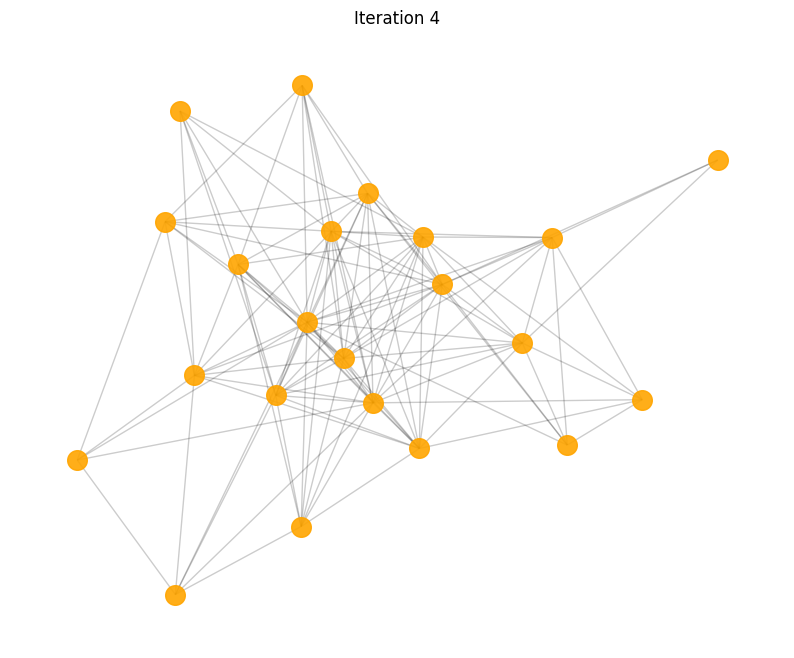

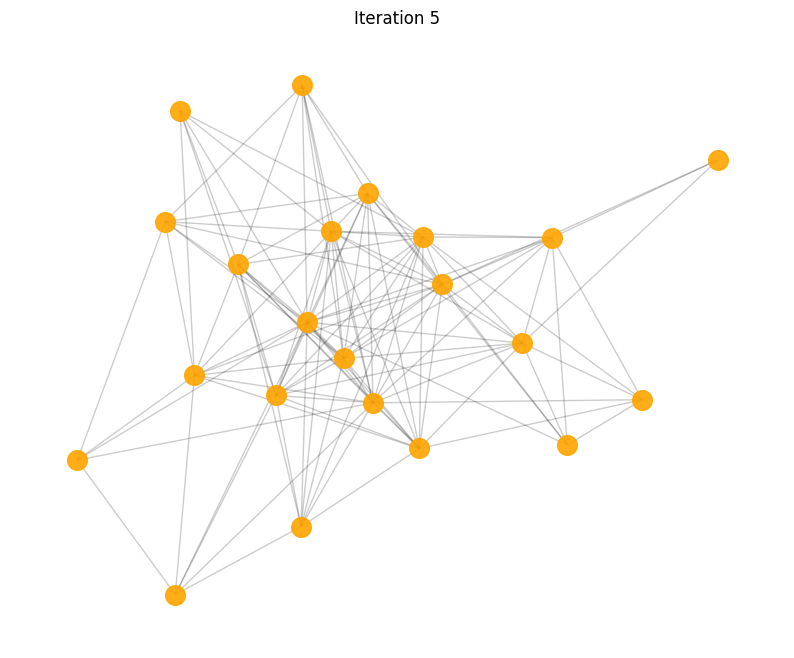

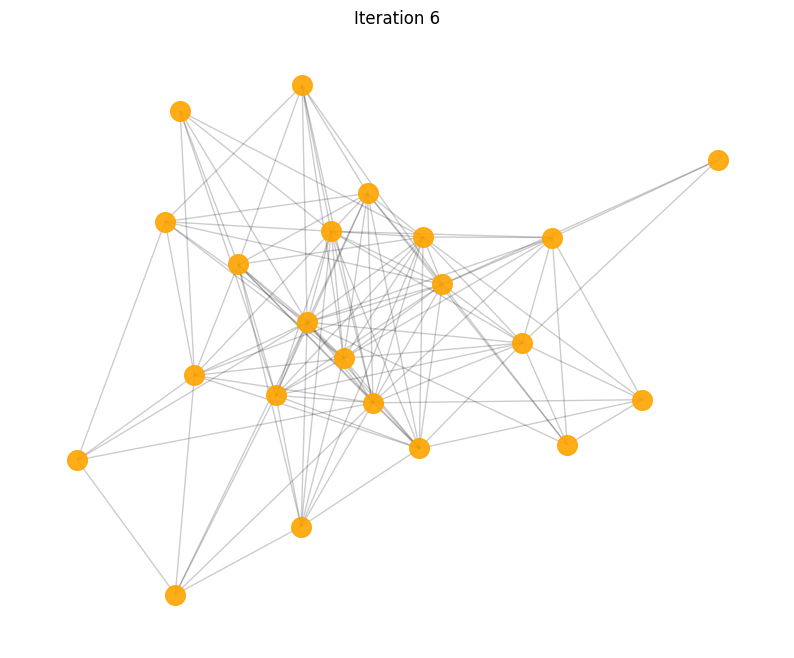

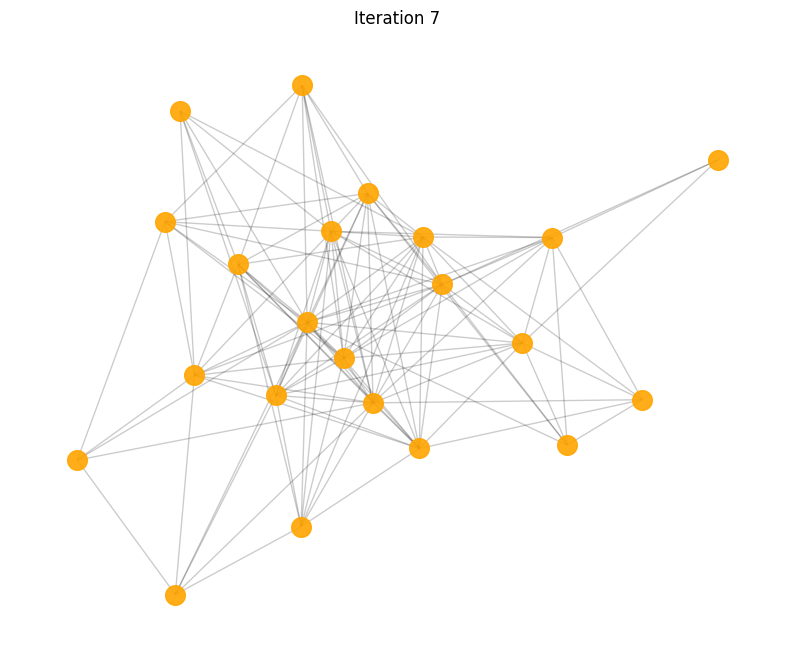

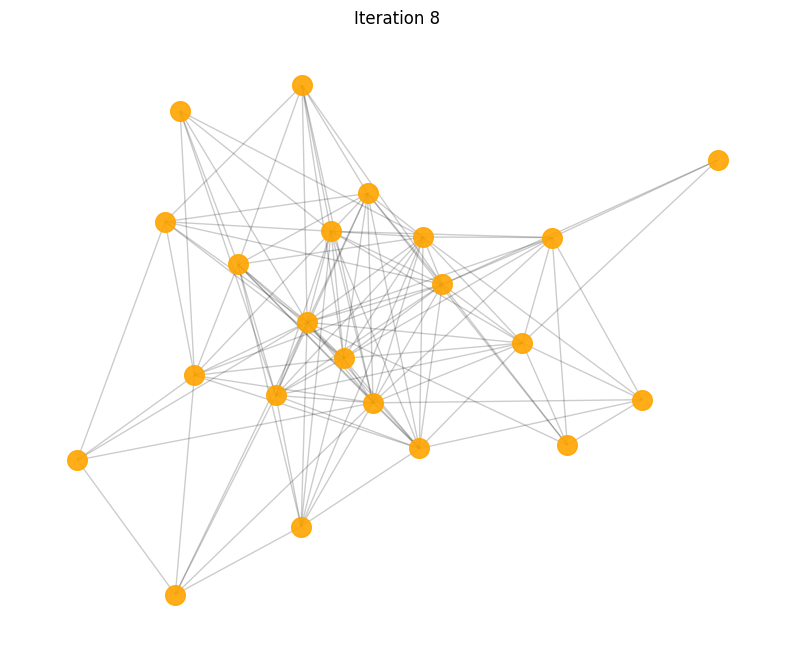

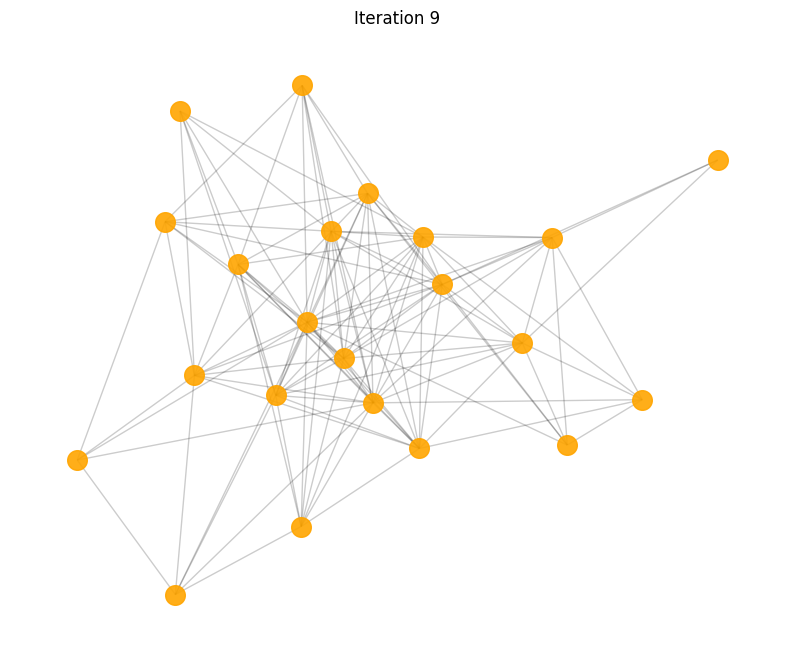

In [ ]:
for t in range(10):

    infection_times = independent_cascade(G, t, infection_times)

    # Visualize the spread of infection
    seed=19
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=seed)
    infected_nodes = [n for n in infection_times if infection_times[n] <= t]
    susceptible_nodes = [n for n in G.nodes() if n not in infected_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='orange', alpha=0.9, node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible_nodes, node_color='blue', alpha=0.5, node_size=200)

    nx.draw_networkx_edges(G, pos, alpha=0.2)
    # nx.draw_networkx_labels(G, pos, font_color='black')

    plt.title(f"Iteration {t}")
    plt.axis('off')
    plt.show()
